# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.shape

(31647, 18)

The dataset contains the 31647 rows and 18 columns

In [4]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Job,marital,education,default,housing,loan,contact,month,poutcome,subscribed column have the object data.

In [5]:
df.duplicated().sum()

0

There are no duplicated values in the dataset.

In [6]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

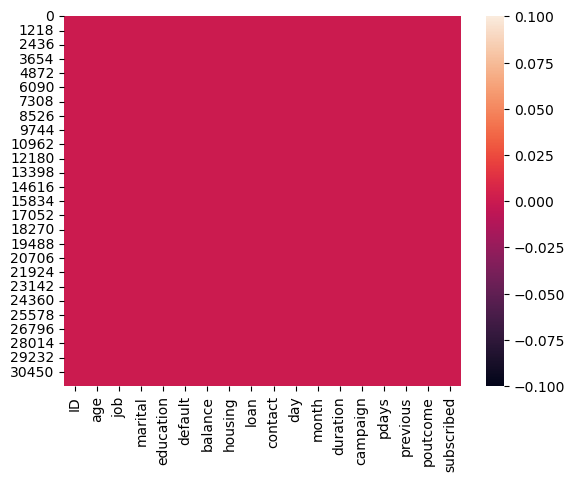

In [7]:
sns.heatmap(df.isnull())

it is very much clear from the above graph that there are no null values present in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


There are two types of data present in the datset i.e. object & integer.

In [9]:
object_data_col=[]

for i in df.columns:
    if df[i].dtypes == 'object':
        object_data_col.append(i)

In [10]:
object_data_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

separated the object data columns from the dataset.

In [11]:
for i in object_data_col:
    print(i,'-' ,df[i].nunique())

job - 12
marital - 3
education - 4
default - 2
housing - 2
loan - 2
contact - 3
month - 12
poutcome - 4
subscribed - 2


In [12]:
df[object_data_col]

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


# Univariate analysis-

In [13]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

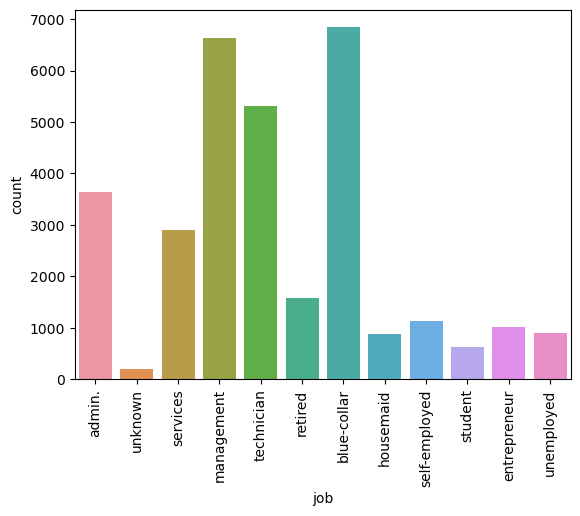

In [14]:
sns.countplot(df['job'])
plt.xticks(rotation=90)

it can be clearly seen that count of blue collar job people is highest.

(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'divorced'), Text(2, 0, 'single')])

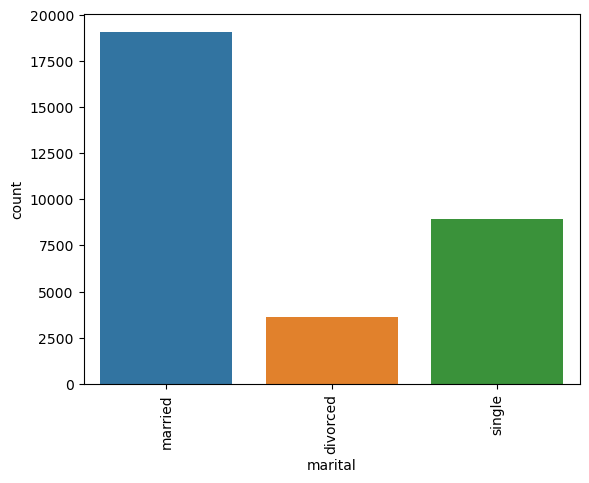

In [15]:
sns.countplot(df['marital'])
plt.xticks(rotation=90)

count of married people is high.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'primary')])

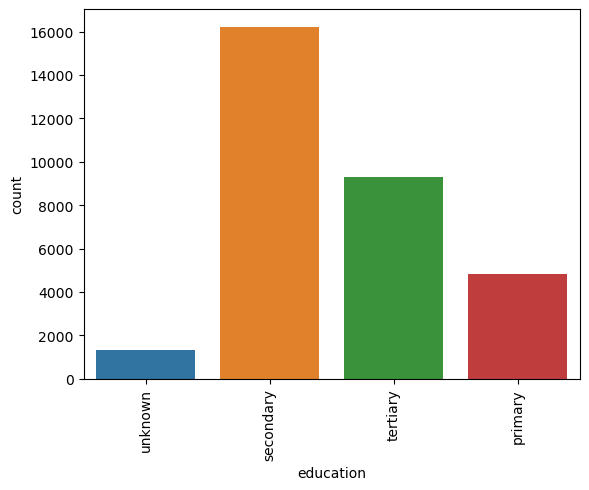

In [16]:
sns.countplot(df['education'])
plt.xticks(rotation=90)

count of people having secondary education is high.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

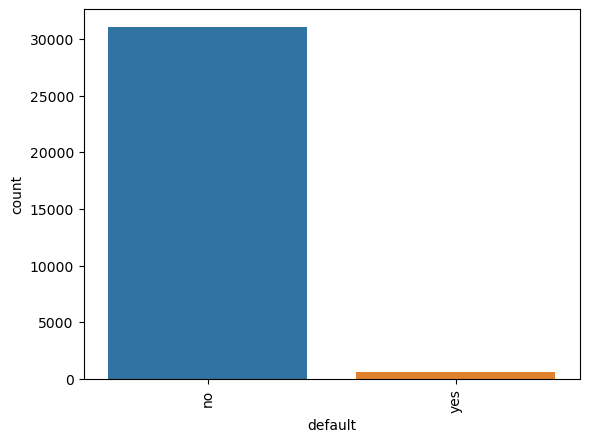

In [17]:
sns.countplot(df['default'])
plt.xticks(rotation=90)

count of no credit in default people is high.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

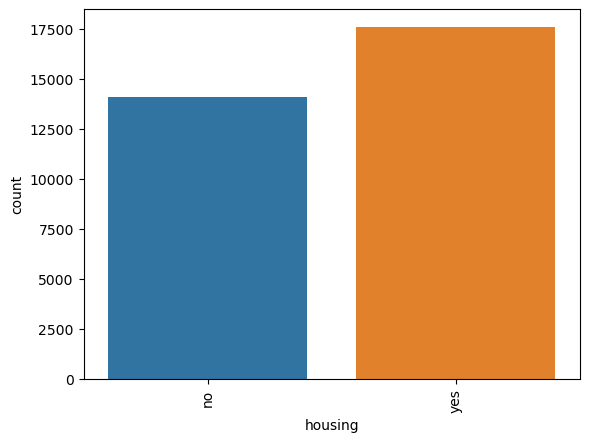

In [18]:
sns.countplot(df['housing'])
plt.xticks(rotation=90)

count of people having housing loan are high.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

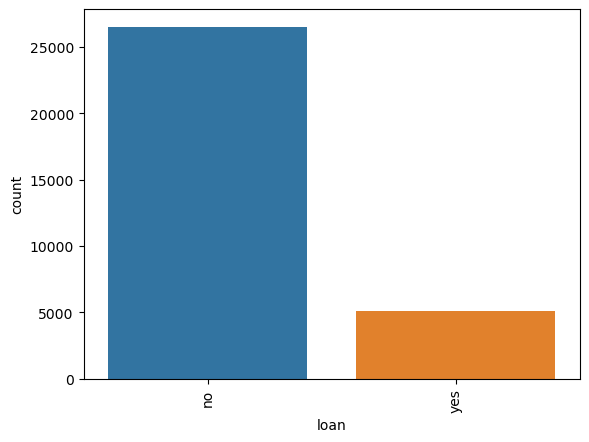

In [19]:
sns.countplot(df['loan'])
plt.xticks(rotation=90)

count of people having no personal loan is high.

(array([0, 1, 2]),
 [Text(0, 0, 'telephone'), Text(1, 0, 'cellular'), Text(2, 0, 'unknown')])

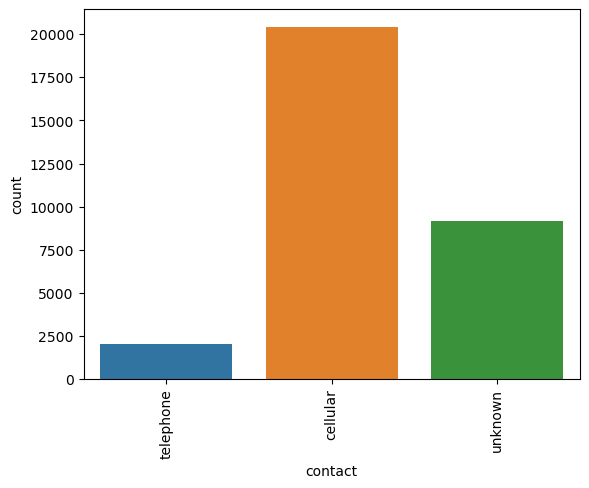

In [20]:
sns.countplot(df['contact'])
plt.xticks(rotation=90)

count of people contacted through cellular contact is high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'nov'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'jun'),
  Text(3, 0, 'feb'),
  Text(4, 0, 'sep'),
  Text(5, 0, 'jan'),
  Text(6, 0, 'may'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'apr'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

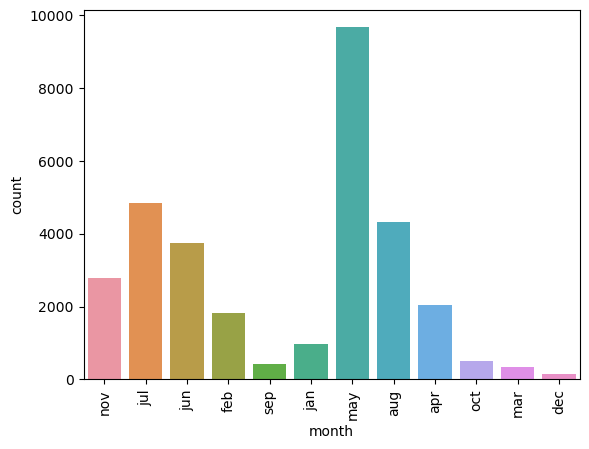

In [21]:
sns.countplot(df['month'])
plt.xticks(rotation=90)

count of people contacted in may month are high.

<AxesSubplot:xlabel='campaign', ylabel='count'>

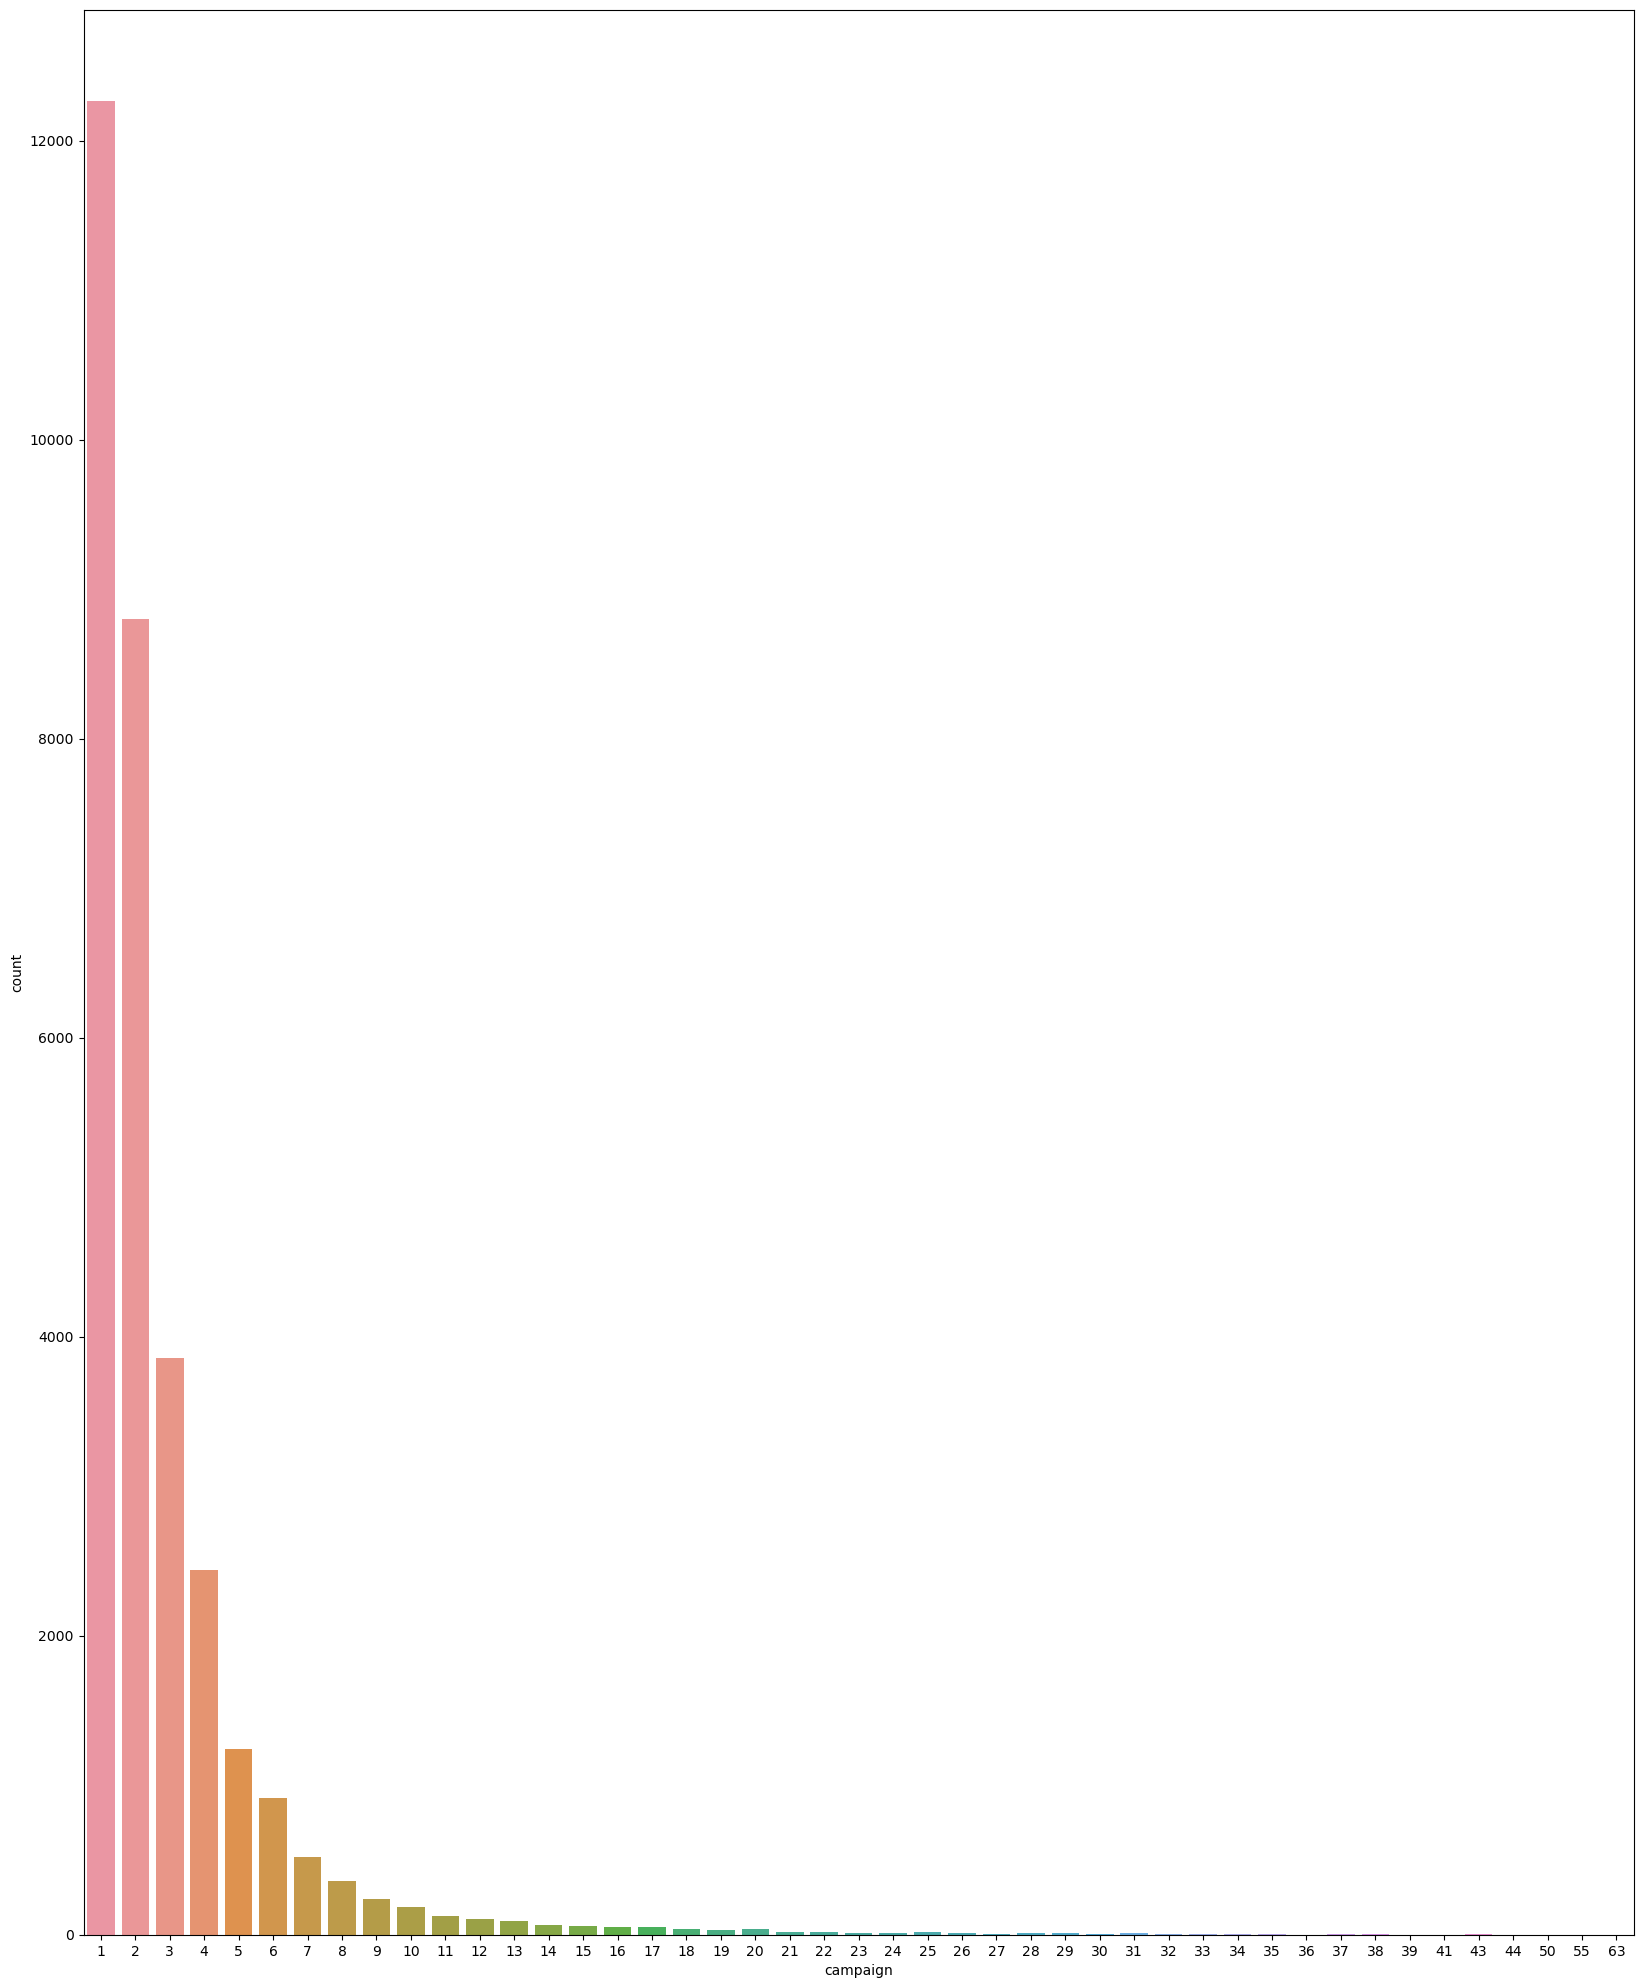

In [22]:
plt.figure(figsize=(20,25))
sns.countplot(df['campaign'])

Count of people contacted 1 time during this campaign are highest.

<AxesSubplot:xlabel='previous', ylabel='count'>

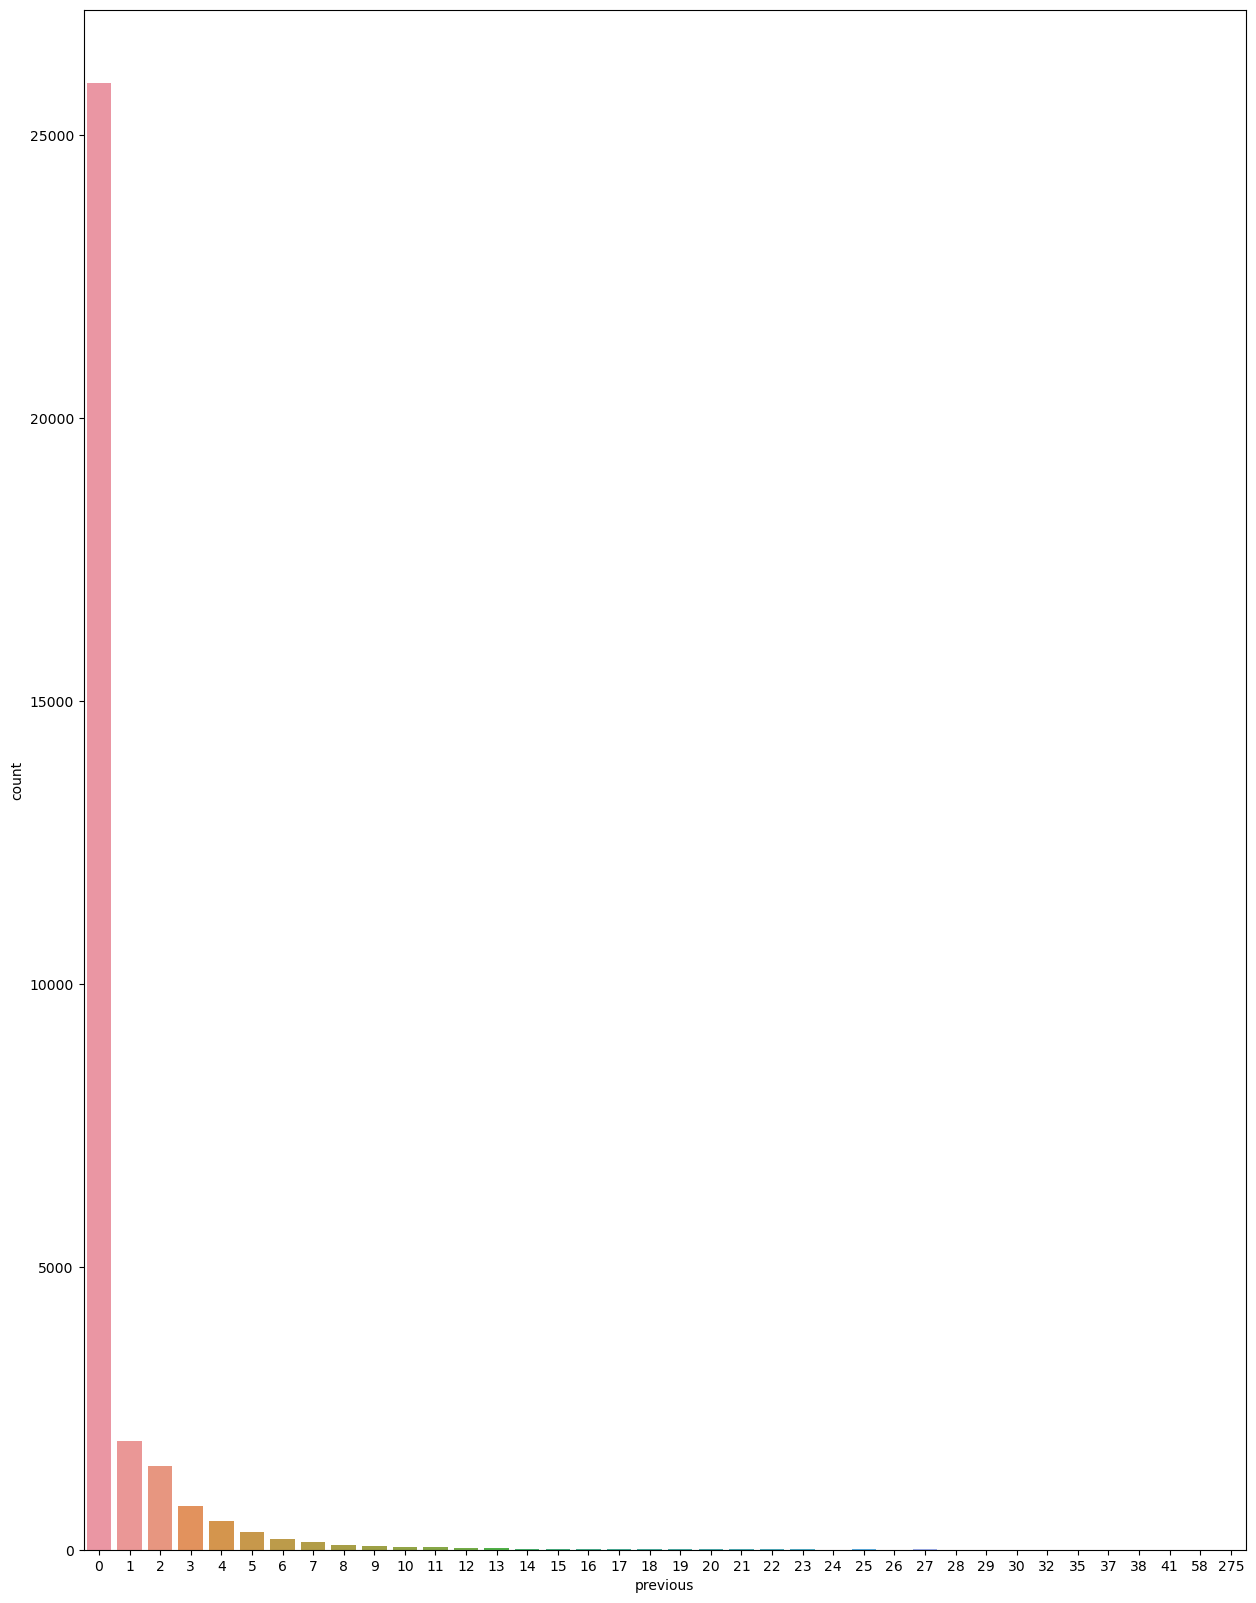

In [23]:
plt.figure(figsize=(15,20))
sns.countplot(df['previous'])

Count of people contacted once before this campaign are highest.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

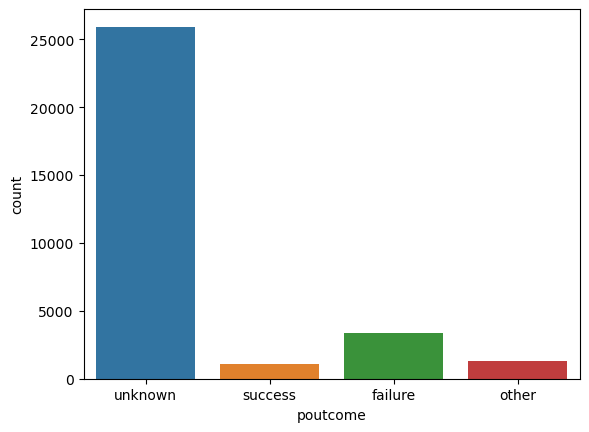

In [24]:
sns.countplot(df['poutcome'])

count of unknown outcome of previous marketing campaign is highest.

# Bivariate analysis-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

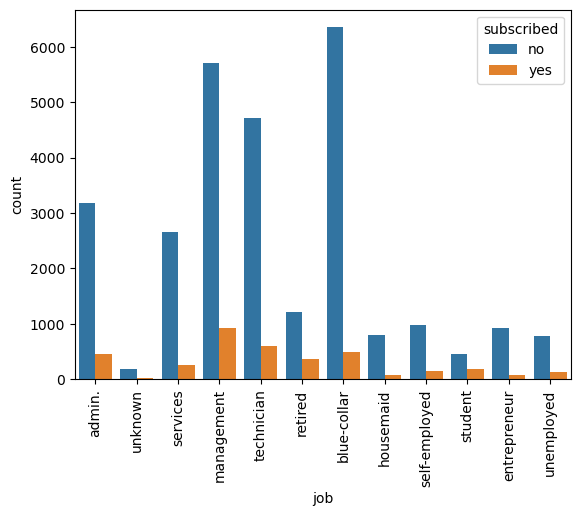

In [25]:
sns.countplot(x='job',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People with blue collar job are more likely to be non subscriber of term deposit.
2. People with management job are more likely to be the subscriber of term deposit.

(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'divorced'), Text(2, 0, 'single')])

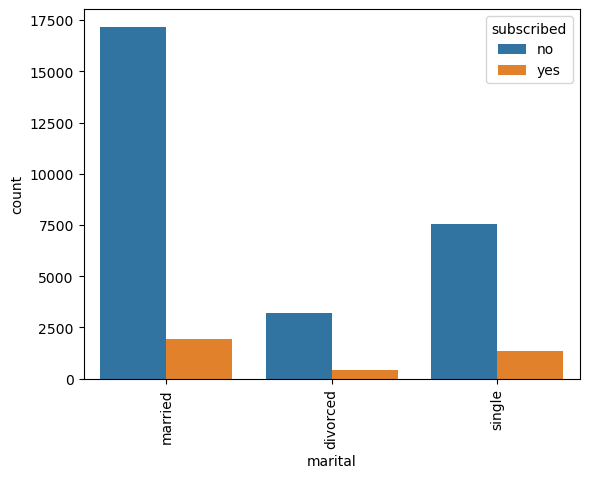

In [26]:
sns.countplot(x='marital',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People who are married are most likely to be non subscriber of term deposit.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'secondary'),
  Text(2, 0, 'tertiary'),
  Text(3, 0, 'primary')])

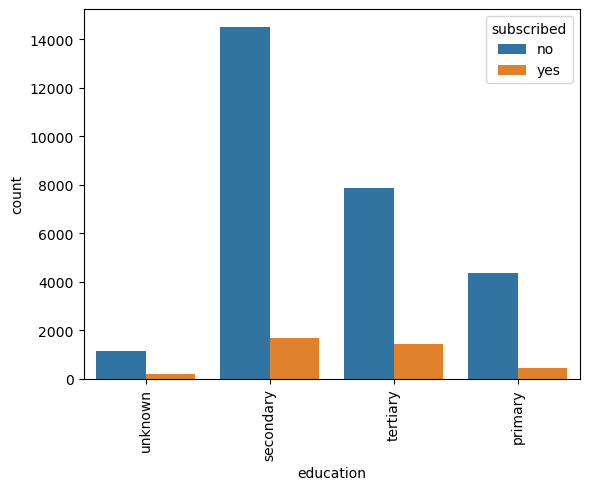

In [27]:
sns.countplot(x='education',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People who have done secondary education has higher chances of non subscriber of term deposit.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

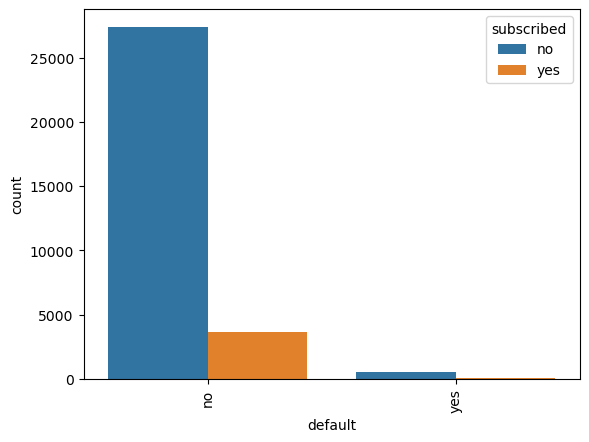

In [28]:
sns.countplot(x='default',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People with no credit in default are more likely to be non subscribers of term deposit.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

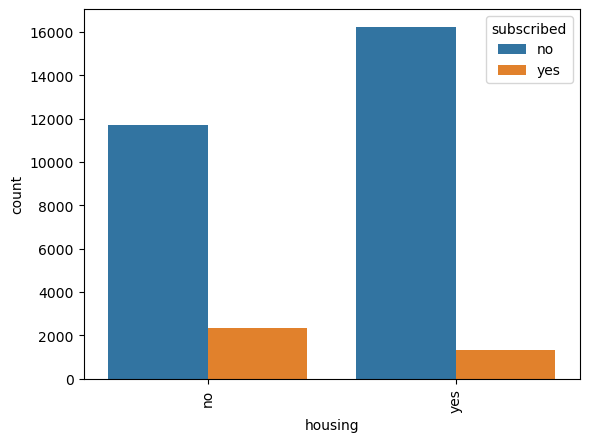

In [29]:
sns.countplot(x='housing',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People with housing loan are more likely to be non subscriber of term deposit.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

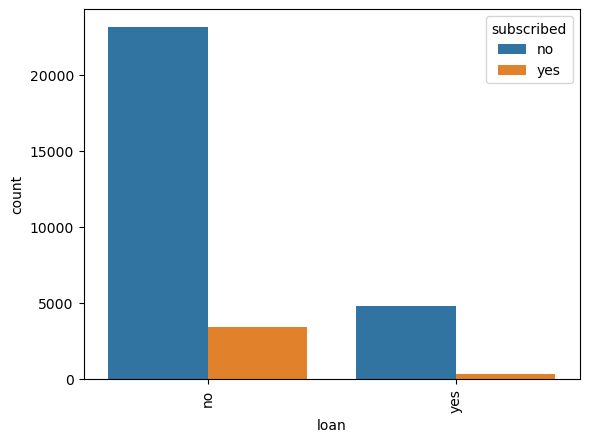

In [30]:
sns.countplot(x='loan',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People without personal loan are more likely to be non subscriber of term deposit.

(array([0, 1, 2]),
 [Text(0, 0, 'telephone'), Text(1, 0, 'cellular'), Text(2, 0, 'unknown')])

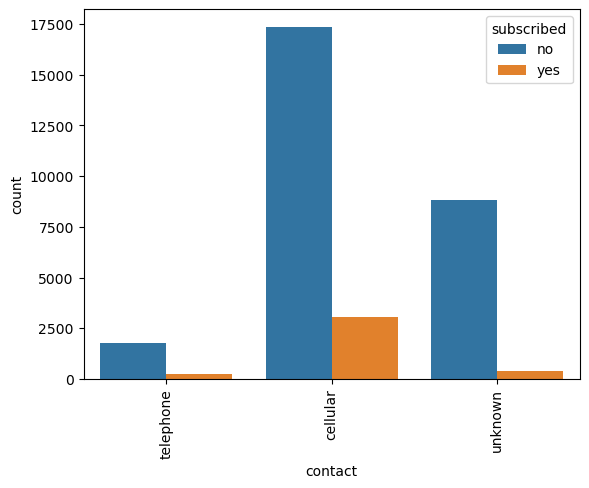

In [31]:
sns.countplot(x='contact',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People contacted by cellular contact are more likely to be non subscriber of term deposit.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'nov'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'jun'),
  Text(3, 0, 'feb'),
  Text(4, 0, 'sep'),
  Text(5, 0, 'jan'),
  Text(6, 0, 'may'),
  Text(7, 0, 'aug'),
  Text(8, 0, 'apr'),
  Text(9, 0, 'oct'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

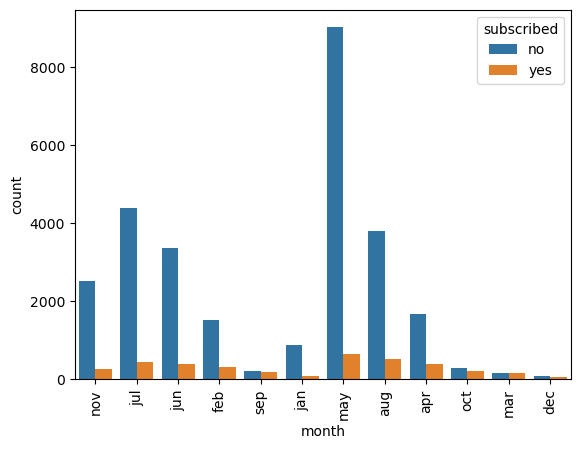

In [32]:
sns.countplot(x='month',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People contacted in may month are most likely to be the non subscribers of term deposit.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'success'),
  Text(2, 0, 'failure'),
  Text(3, 0, 'other')])

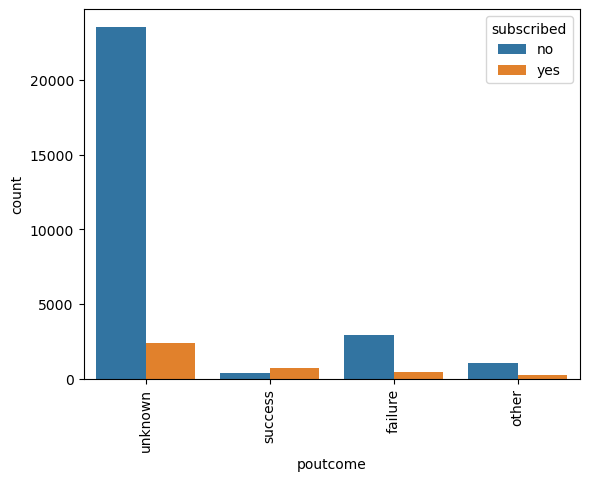

In [33]:
sns.countplot(x='poutcome',hue='subscribed',data=df)
plt.xticks(rotation=90)

1. People with unknown outcome of previous campaign are most likely to be non subscriber of term deposit.

In [34]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [35]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [36]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

There is class imbalance problem exist in target variable.

In [37]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [38]:
df.nunique().to_frame('No of unique values')

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


id column which is a nominal data column, so its better to drop it moving further.

In [39]:
df=df.drop(columns=['ID'],axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Cheking Statistics of data-

In [40]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations-

1. The count of all the columns are equal which means that there are no null values are present in the columns.
2. Mean is greater than median in columns like age,balance,campaign,pdays,previous where it can be seen that data is right skewed.
3. Mean is lower than the median in columns like day which has left skewed data.
4. there is hug gap bw 75% and max values in columns like age,balance,day,duration,campaign,previous which means there are outliers present in the data.
5. balance & pdays coliumns have very high difference bw 75% and maximum value which means very much outliers present in these columns.

In [41]:
object_data_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

# Bivariate analysis-

In [42]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'blue-collar'),
  Text(7, 0, 'housemaid'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'student'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'unemployed')])

<Figure size 2000x1500 with 0 Axes>

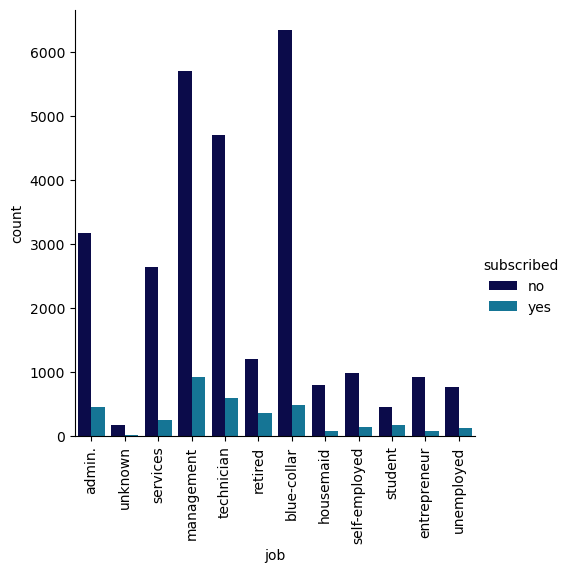

In [43]:
plt.figure(figsize=(20,15))
sns.catplot(x='job',hue='subscribed',palette='ocean',kind='count',data=df)
plt.xticks(rotation=90)

1. People with blue collar job are the most who do not subscribe for term deposit.
2. People with management job subscribe most for term deposit.

# Encoding of object data-

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
x= LabelEncoder()

In [46]:
df['job']=x.fit_transform(df['job'])

In [47]:
df['marital']=x.fit_transform(df['marital'])

In [48]:
df['education']=x.fit_transform(df['education'])

In [49]:
df['default']=x.fit_transform(df['default'])

In [50]:
df['housing']=x.fit_transform(df['housing'])

In [51]:
df['loan']=x.fit_transform(df['loan'])

In [52]:
df['contact']=x.fit_transform(df['contact'])

In [53]:
df['month']=x.fit_transform(df['month'])

In [54]:
df['poutcome']=x.fit_transform(df['poutcome'])

In [55]:
df['subscribed']=x.fit_transform(df['subscribed'])

In [56]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [57]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


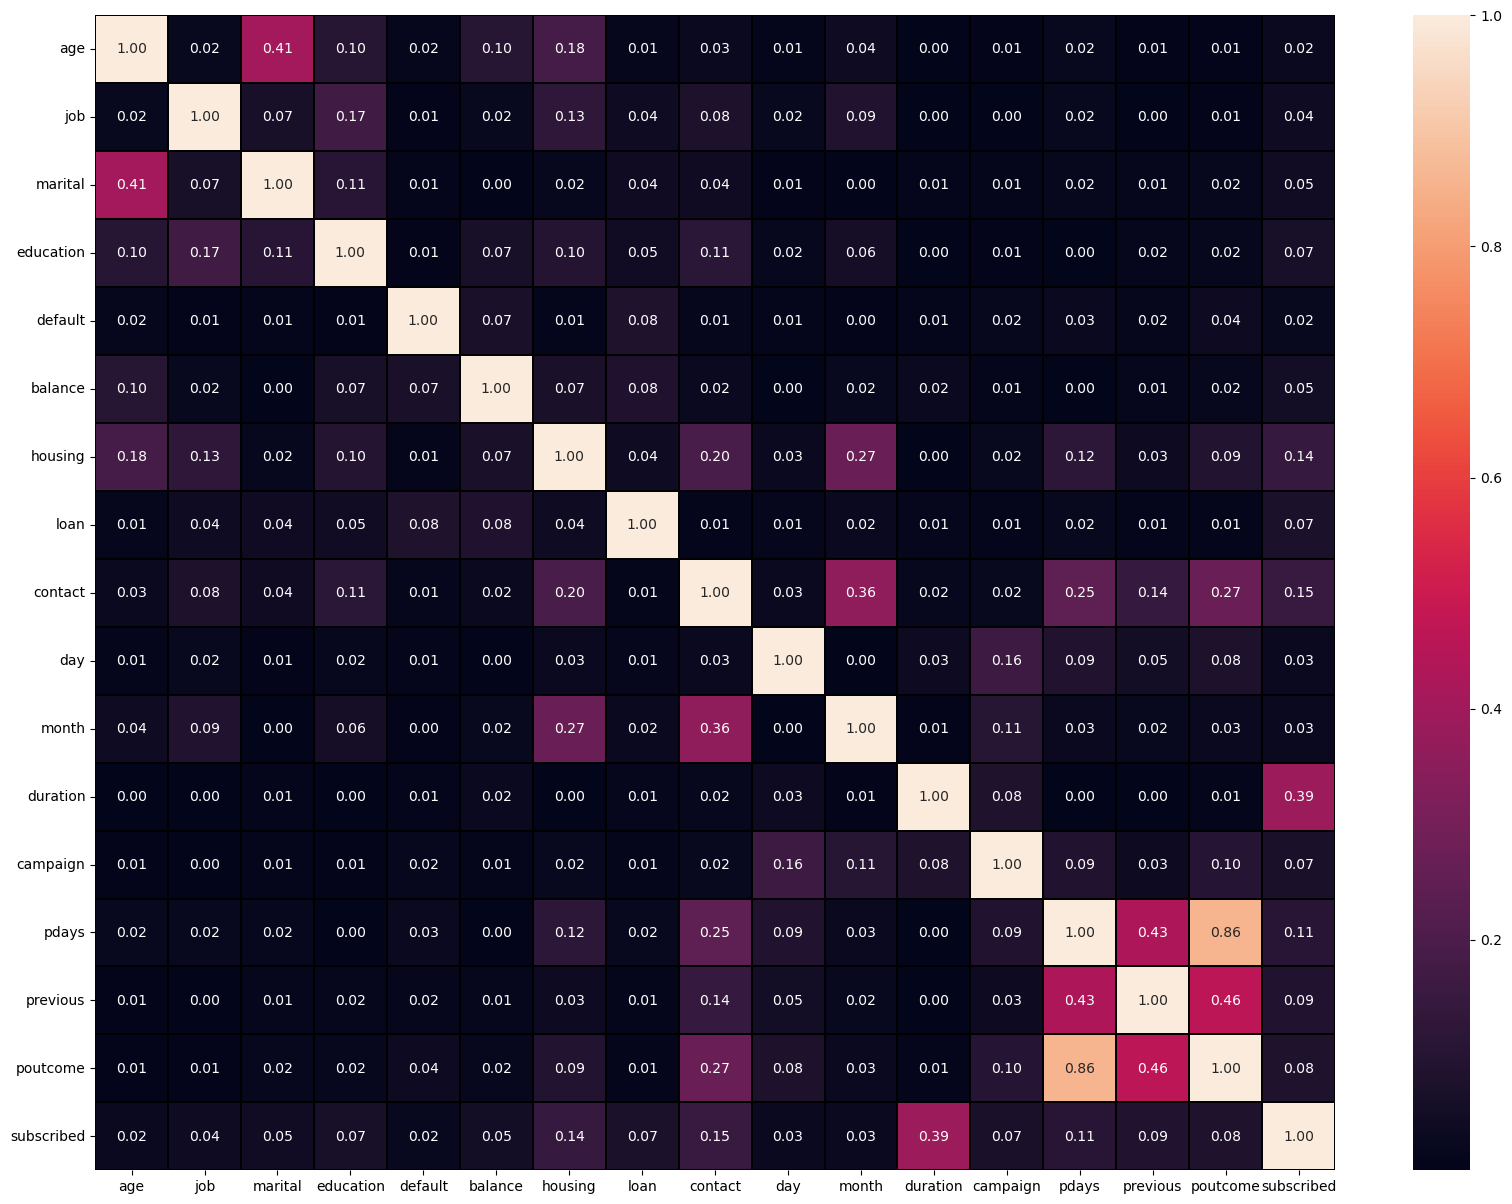

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2)
plt.show()

Observations-

1. There is 41% correlationship bw age and marital.
2. There is 36% correlation bw month & contact.
3. There is 39% correlationship bw duration & subscribed.
4. There is 86% correlationship bw pdays & poutcome which shows there is multicollinearity among these features.
5. There is 43% correlationship bw previous and pdays.
6. There is 46% correlationship bw putcome & previous.

In [59]:
#Correlation of features with target variable-

In [60]:
df.corr()['subscribed']

age           0.024538
job           0.038921
marital       0.046043
education     0.066051
default      -0.020168
balance       0.050807
housing      -0.141092
loan         -0.072266
contact      -0.150051
day          -0.029600
month        -0.028088
duration      0.389838
campaign     -0.070607
pdays         0.108290
previous      0.088081
poutcome     -0.080895
subscribed    1.000000
Name: subscribed, dtype: float64

<AxesSubplot:>

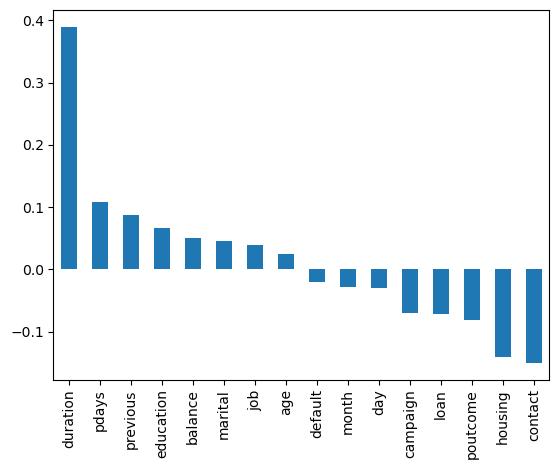

In [61]:
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar')

1. duration has the highest correlation with target variable i.e 38%.
2. Contact & housing also has good positive correlationship with target variable i.e. 15%.
3. marital,job,age,default,month,day has lowest correlationship with target variable.

# Checking Data distribution-

In [62]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [63]:
#separating the continous data columns only-

In [64]:
x=df[['age','balance','day','campaign','pdays','previous','poutcome','duration']]
y=df['subscribed']

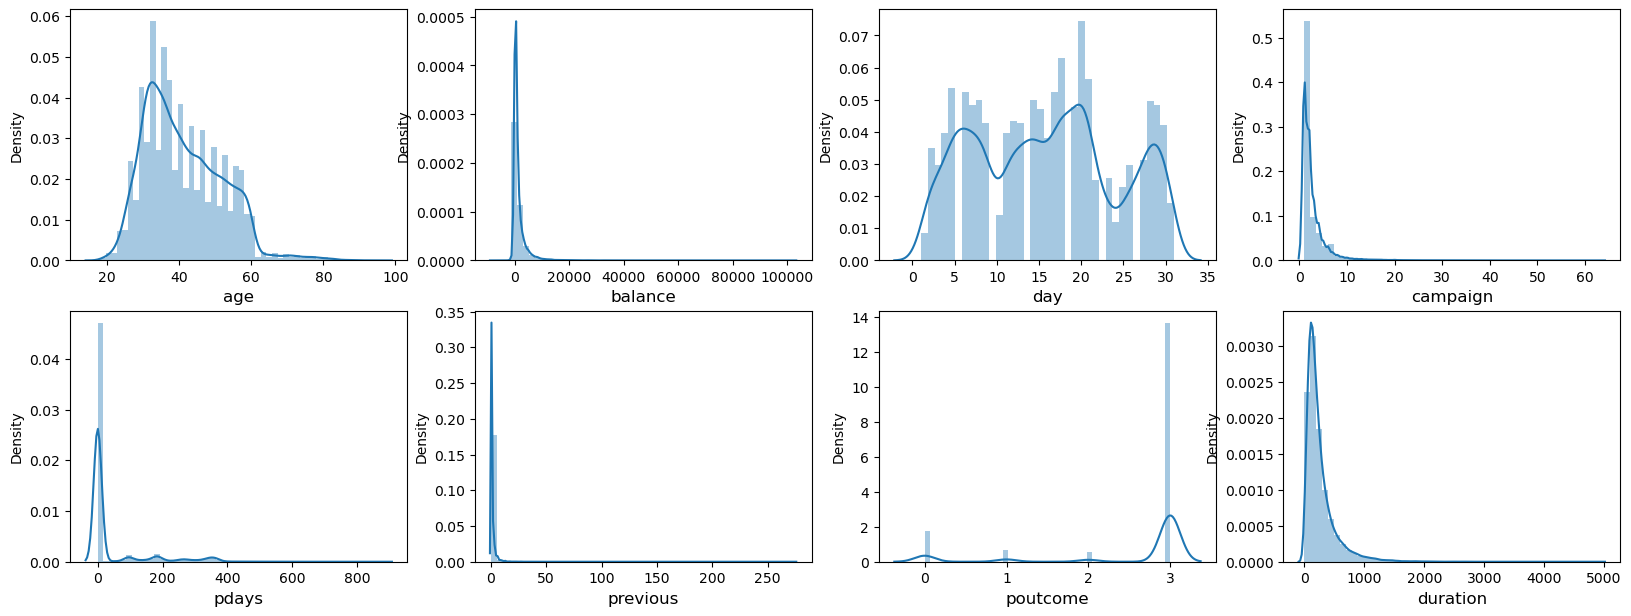

In [65]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()    

In [66]:
x.skew()

age          0.681607
balance      7.995696
day          0.087185
campaign     4.873935
pdays        2.642374
previous    49.302348
poutcome    -1.996421
duration     3.199766
dtype: float64

skewness is high in balance column,campaign column,pdays,previous,poutcome.

# Removing skewness of data through Cube root method-

In [67]:
df['age']=np.cbrt(df['age'])

In [68]:
df['balance']=np.cbrt(df['balance'])

In [69]:
df['campaign']=np.cbrt(df['campaign'])

In [70]:
df['pdays']=np.cbrt(df['pdays'])

In [71]:
df['previous']=np.cbrt(df['previous'])

In [72]:
df['poutcome']=np.cbrt(df['poutcome'])

In [73]:
df['duration']=np.cbrt(df['duration'])

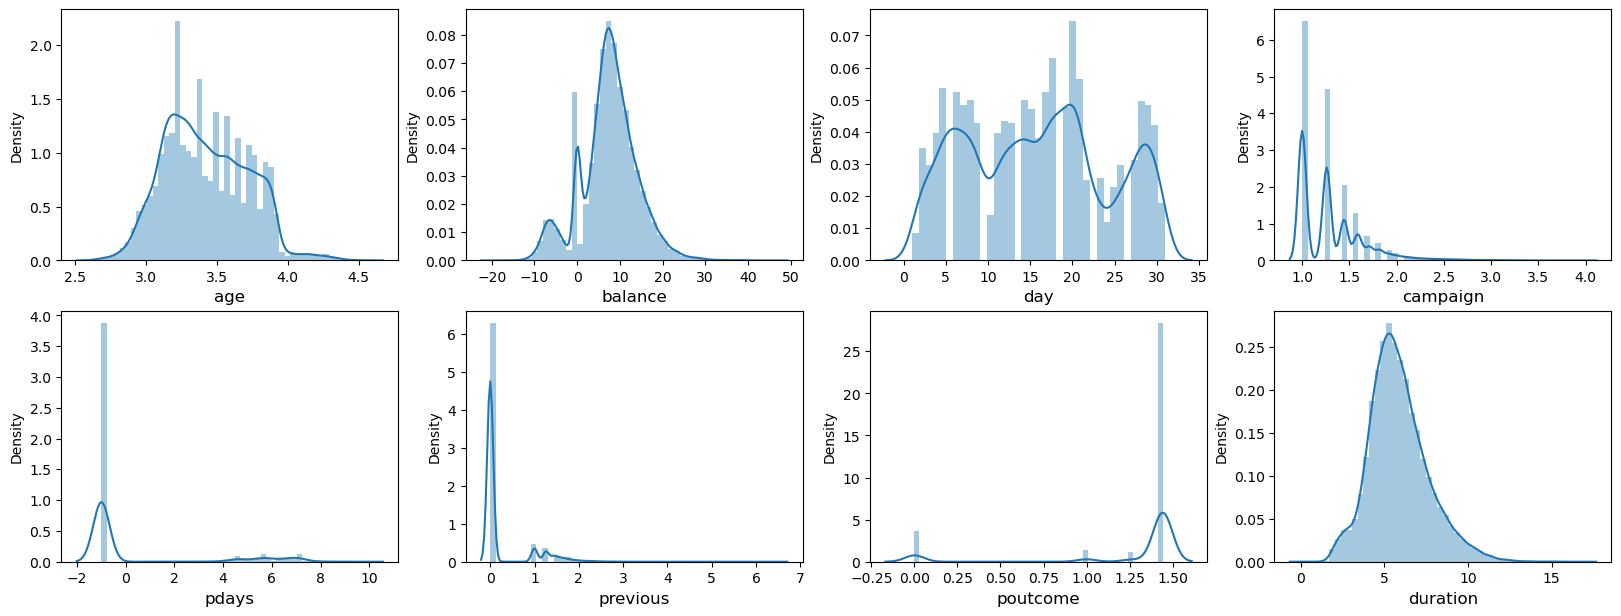

In [74]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

In [75]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -2.386125
subscribed    2.377445
dtype: float64

The maximum skewness has been removed from the continous dataset.

# Outliers checking-

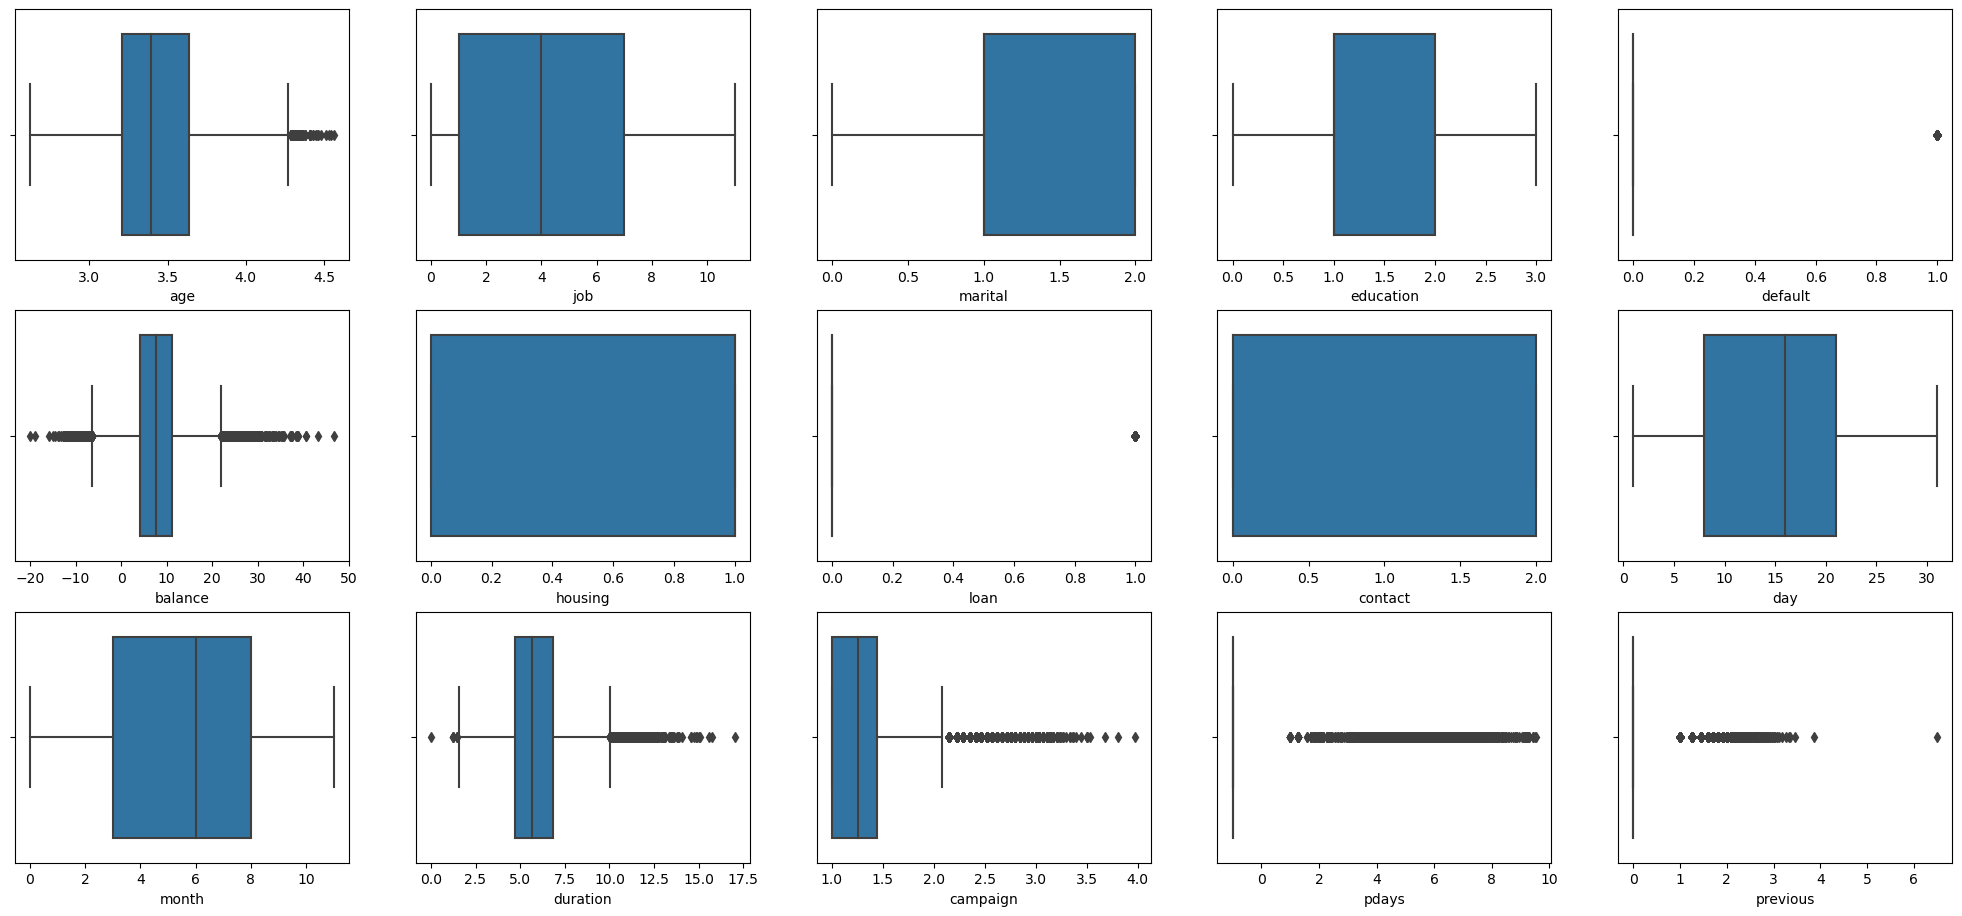

In [76]:
plt.figure(figsize=(25,15))
plotnumber=1

for i in df.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

In [77]:
df.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

We can see that outliers present in age,default,balance,loan column.

# Removing outliers through Z-score method-

In [78]:
from scipy.stats import zscore
import numpy as np

In [79]:
z=np.abs(zscore(x))
z.shape

(31647, 8)

In [80]:
threshold=3
print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([3, 1, 4, ..., 4, 5, 7], dtype=int64))


In [81]:
df1=df[( z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(31647, 17)
(28124, 17)


In [82]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.00000,1.442250,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.00000,1.442250,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.00000,1.442250,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.44225,1.259921,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.00000,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.000000,0.00000,1.442250,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.00000,1.442250,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.00000,1.442250,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.00000,1.442250,1


In [83]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
data_loss

11.132176825607482

The data loss due to outliers removal is 11% of the total data.

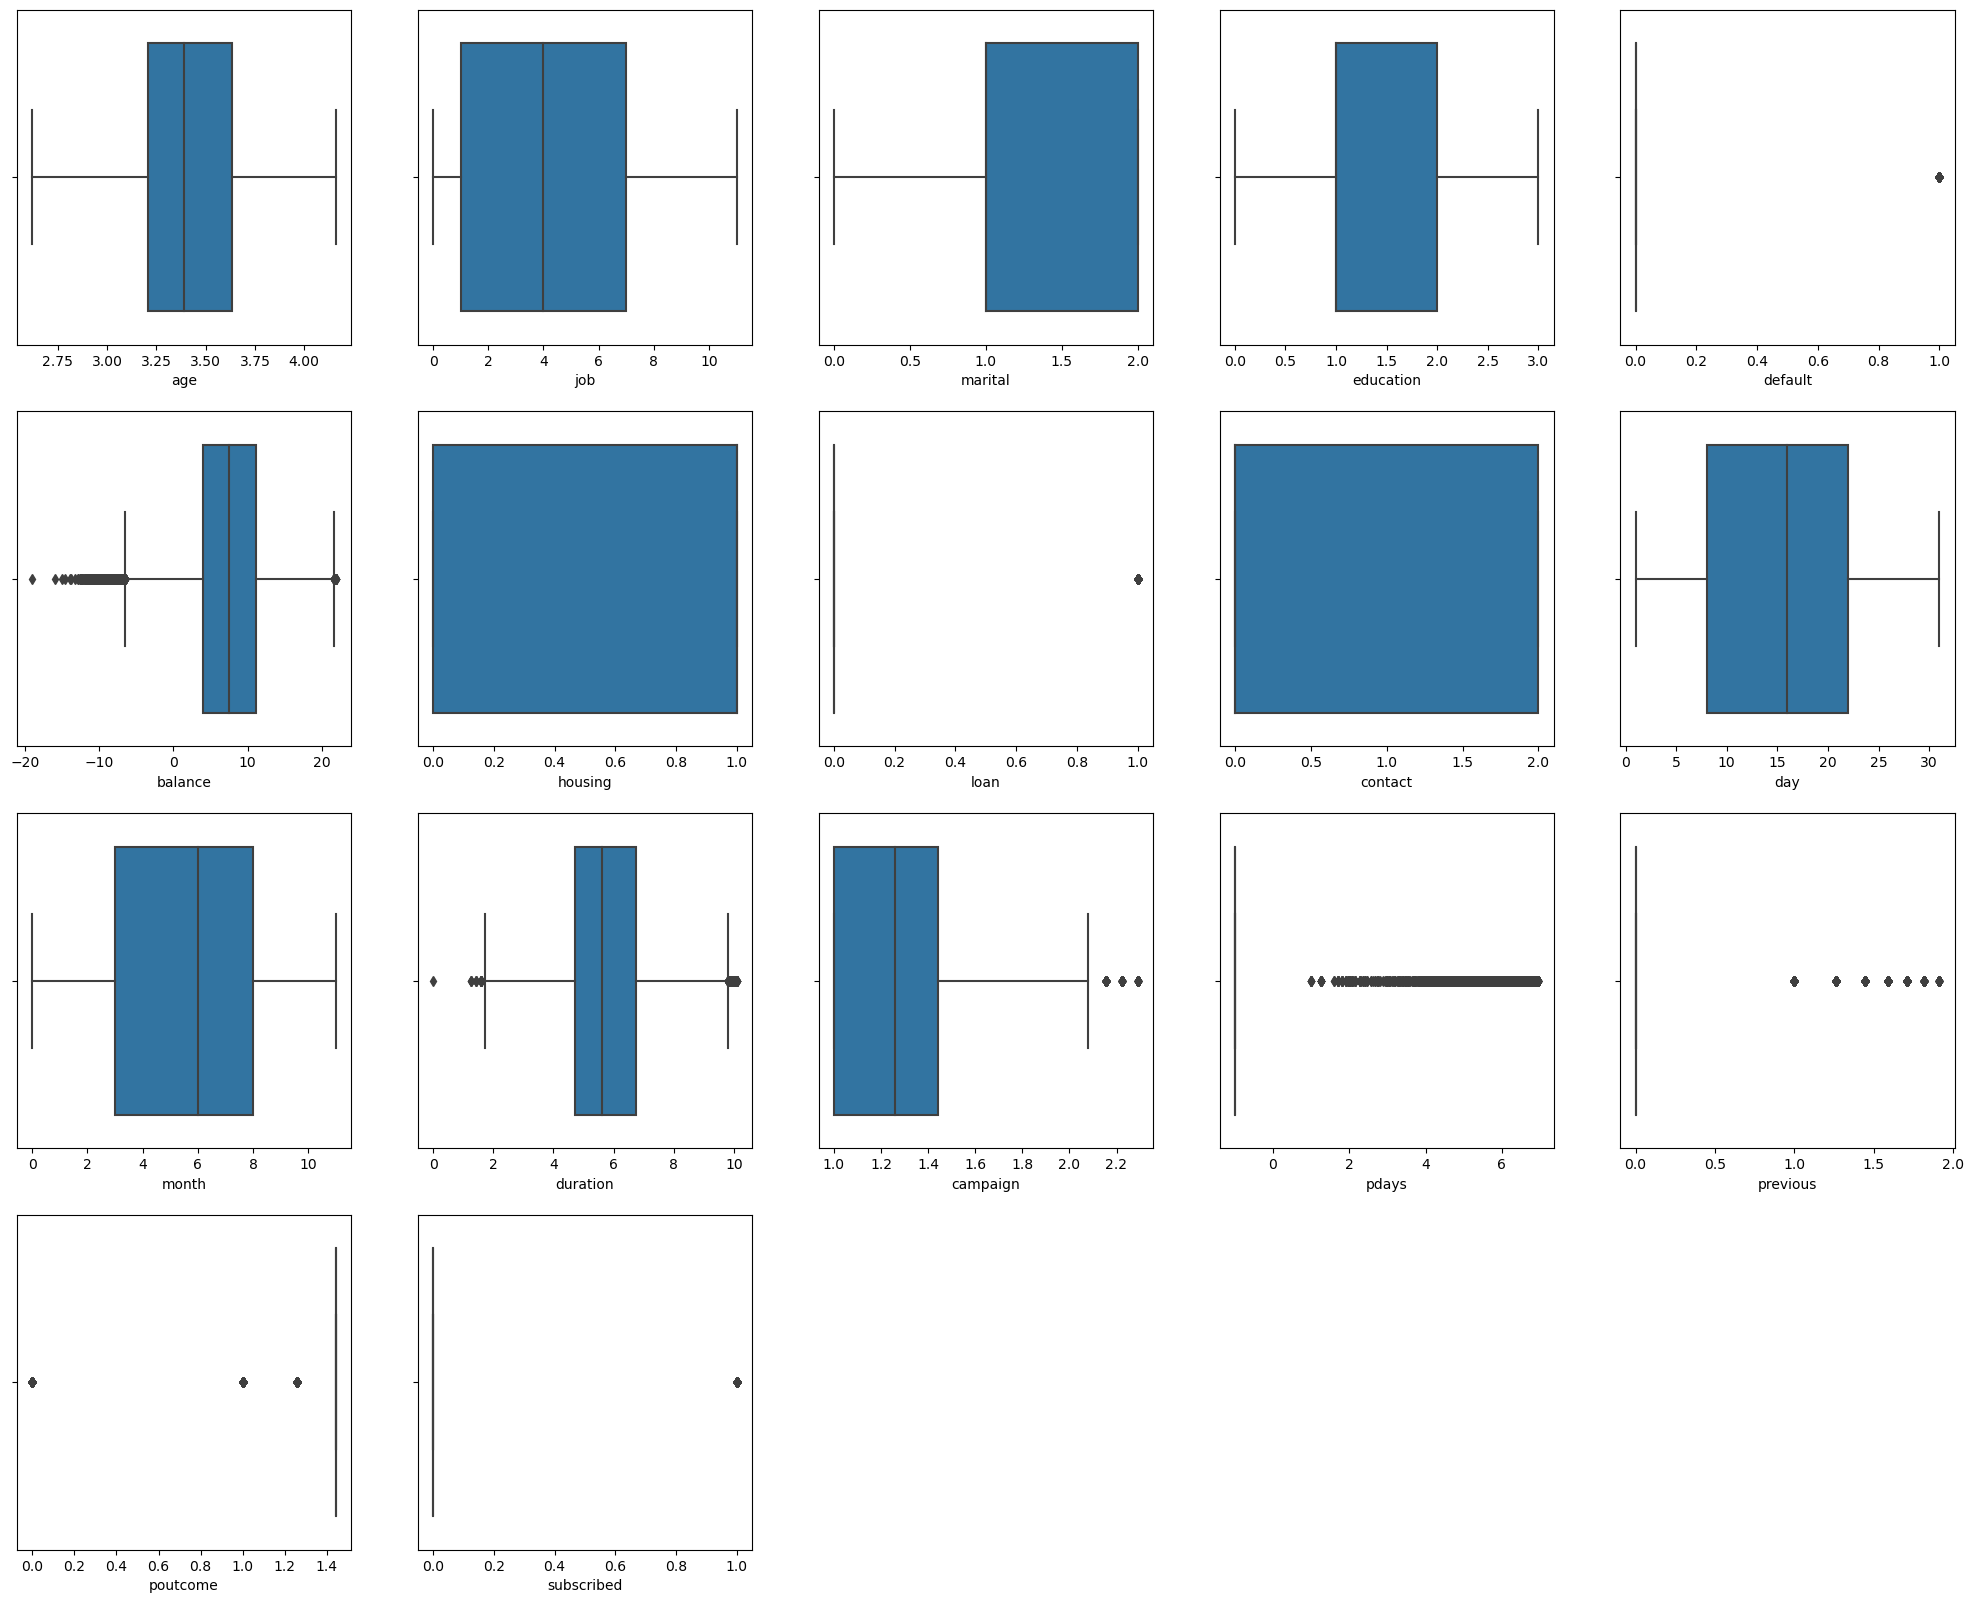

In [84]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in df1.columns:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df1[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

In [85]:
df.corr()['subscribed']

age           0.009310
job           0.038921
marital       0.046043
education     0.066051
default      -0.020168
balance       0.097107
housing      -0.141092
loan         -0.072266
contact      -0.150051
day          -0.029600
month        -0.028088
duration      0.379716
campaign     -0.082134
pdays         0.152555
previous      0.167908
poutcome     -0.040794
subscribed    1.000000
Name: subscribed, dtype: float64

1. Here we can see that balance & loan,pdays and default column has very less correlation with the target variable and have most outliers., so i can drop these three columns.
2. Age,Day, month & potcome,job also has very less correlationship with target variable so i can drop them too.

In [990]:
df=df1.drop(columns=['balance','loan','default','day','month','poutcome','age','campaign','poutcome'])
df

,job,marital,education,housing,contact,duration,pdays,previous,subscribed
0,0,1,3,0,1,3.530348,-1.000000,0.00000,0
1,11,1,1,0,0,4.497941,-1.000000,0.00000,0
2,7,1,1,1,0,6.214465,-1.000000,0.00000,0
3,4,0,2,0,0,9.535417,4.379519,1.44225,1
4,9,1,1,1,0,7.243156,-1.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...
31640,4,2,1,0,2,3.107233,-1.000000,0.00000,0
31641,9,2,2,0,2,7.617412,-1.000000,0.00000,0
31642,4,2,2,1,0,4.876999,-1.000000,0.00000,0
31643,4,0,2,0,0,7.594363,-1.000000,0.00000,1


Dropped the above columns which are having very less correaltionship with target variable and having most outliers.

In [802]:
df.corr()['subscribed']

job           0.036743
marital       0.056387
education     0.075838
housing      -0.145640
contact      -0.158031
duration      0.328075
pdays         0.167936
previous      0.189480
subscribed    1.000000
Name: subscribed, dtype: float64

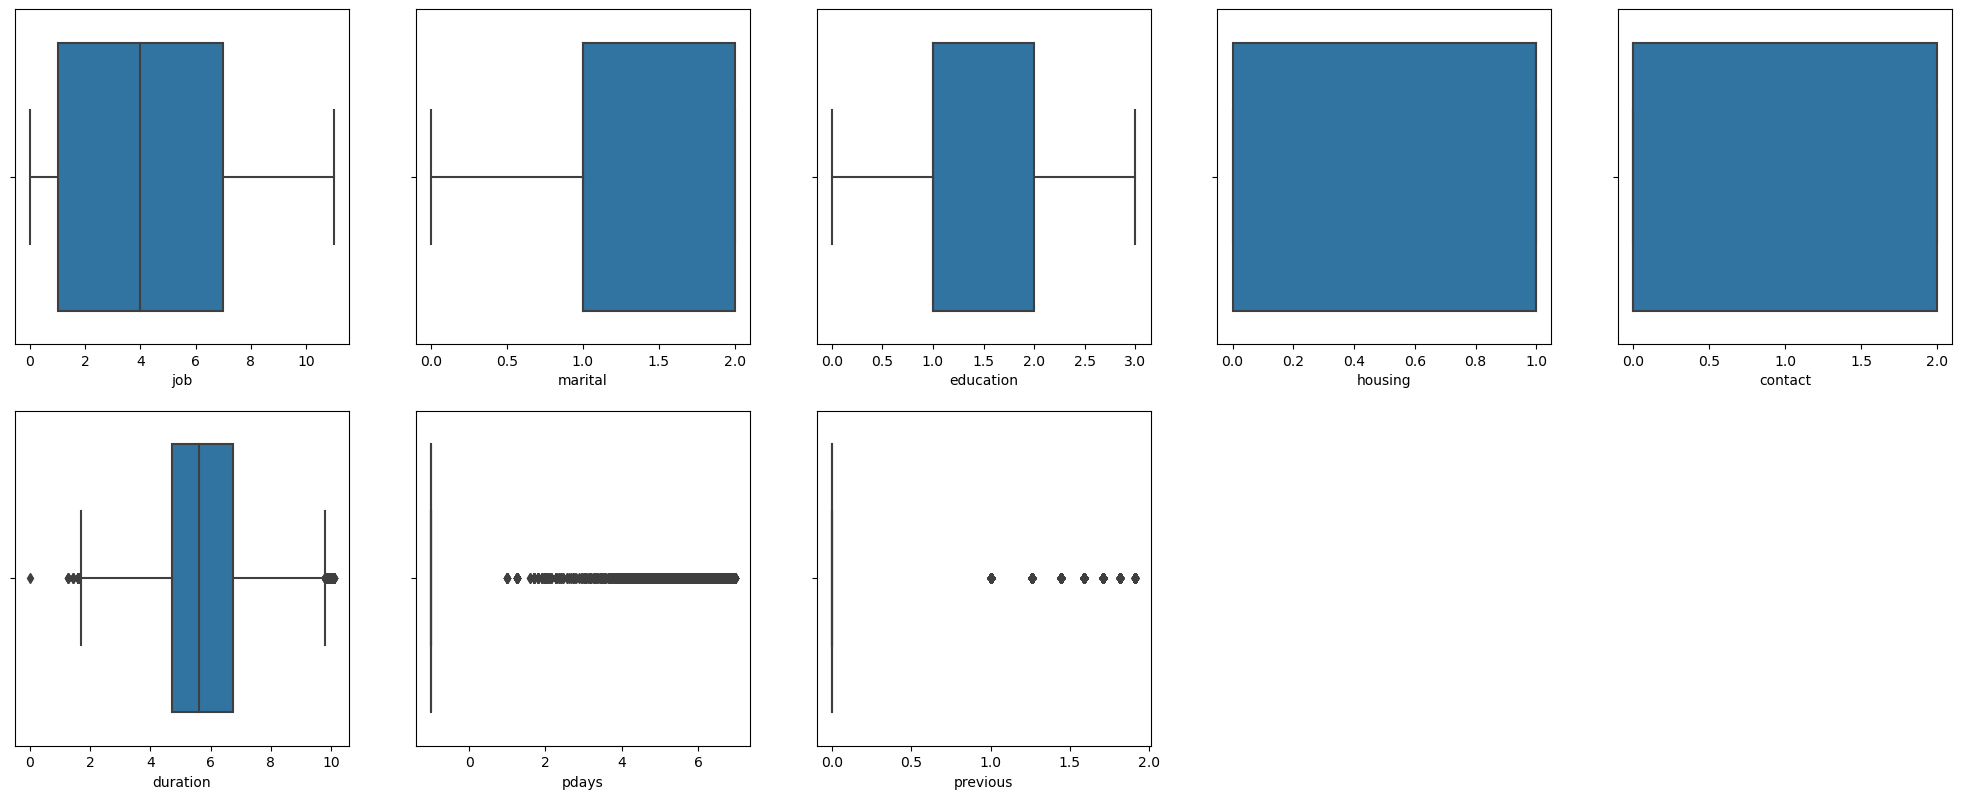

In [803]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in df.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

here we can see that outliers has been removed mostly and previous columns are having the outliers but they are the categorical columns so we are not worried about the outliers in these columns.

In [804]:
df.corr()['subscribed']

job           0.036743
marital       0.056387
education     0.075838
housing      -0.145640
contact      -0.158031
duration      0.328075
pdays         0.167936
previous      0.189480
subscribed    1.000000
Name: subscribed, dtype: float64

In [805]:
x=df.drop(columns=['subscribed'])
y=df.subscribed

# Featutre scaling-

In [806]:
from sklearn.preprocessing import StandardScaler

In [807]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Oversampling-

In [808]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

There is a class imbalance in the dataset.

In [809]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_scaled,y=sm.fit_resample(x_scaled,y)

In [810]:
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

Here we can see that class imbalace problem has been resolved

# Model building-

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score

In [489]:
lr=LogisticRegression()

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)                

Best accuracy is 0.8708687908173363 at random state 129


In [491]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=maxrs)

In [492]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [493]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [494]:
#RandomForest-

In [495]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [496]:
metric_score(rf,x_train,x_test,y_train,y_test, train=True)
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.43%
/n=====================Test Result=====================
accuracy_score: 87.07%
confusion matrix is: 
[[4361  760]
 [ 547 4438]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5121
           1       0.85      0.89      0.87      4985

    accuracy                           0.87     10106
   macro avg       0.87      0.87      0.87     10106
weighted avg       0.87      0.87      0.87     10106



In [497]:
#LogisticRegression-

In [498]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [499]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 79.41%
/n=====================Test Result=====================
accuracy_score: 79.65%
confusion matrix is: 
[[3973 1148]
 [ 909 4076]]


 Test classification report
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      5121
           1       0.78      0.82      0.80      4985

    accuracy                           0.80     10106
   macro avg       0.80      0.80      0.80     10106
weighted avg       0.80      0.80      0.80     10106



In [500]:
#SupportVectorMachineClassifier-

In [501]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [502]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 81.89%
/n=====================Test Result=====================
accuracy_score: 81.87%
confusion matrix is: 
[[3859 1262]
 [ 570 4415]]


 Test classification report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      5121
           1       0.78      0.89      0.83      4985

    accuracy                           0.82     10106
   macro avg       0.82      0.82      0.82     10106
weighted avg       0.83      0.82      0.82     10106



In [503]:
#GradientBoostingClassifier-

In [504]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [505]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 83.95%
/n=====================Test Result=====================
accuracy_score: 83.87%
confusion matrix is: 
[[4055 1066]
 [ 564 4421]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      5121
           1       0.81      0.89      0.84      4985

    accuracy                           0.84     10106
   macro avg       0.84      0.84      0.84     10106
weighted avg       0.84      0.84      0.84     10106



In [506]:
#AdaBoostClassifier-

In [507]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [508]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 81.65%
/n=====================Test Result=====================
accuracy_score: 81.72%
confusion matrix is: 
[[4082 1039]
 [ 808 4177]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      5121
           1       0.80      0.84      0.82      4985

    accuracy                           0.82     10106
   macro avg       0.82      0.82      0.82     10106
weighted avg       0.82      0.82      0.82     10106



In [509]:
#BaggingClassifier-

In [510]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [511]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.50%
/n=====================Test Result=====================
accuracy_score: 85.70%
confusion matrix is: 
[[4359  762]
 [ 683 4302]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      5121
           1       0.85      0.86      0.86      4985

    accuracy                           0.86     10106
   macro avg       0.86      0.86      0.86     10106
weighted avg       0.86      0.86      0.86     10106



In [512]:
#ExtraTreeClassifier-

In [513]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [514]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.43%
/n=====================Test Result=====================
accuracy_score: 87.35%
confusion matrix is: 
[[4387  734]
 [ 544 4441]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      5121
           1       0.86      0.89      0.87      4985

    accuracy                           0.87     10106
   macro avg       0.87      0.87      0.87     10106
weighted avg       0.87      0.87      0.87     10106



# Cross validation-

In [515]:
from sklearn.model_selection import cross_val_score

In [516]:
#Random forest-

In [518]:
score=cross_val_score(rf,x_s v caled,y)
print(score)
print(score.mean())

[0.83682961 0.86987928 0.8670097  0.87610094 0.87253835]
0.8644715741002866


In [ ]:
#Logistic regression-

In [519]:
score=cross_val_score(lr,x_scaled,y)
print(score)
print(score.mean())

[0.79032258 0.7917079  0.79586384 0.79614052 0.79426027]
0.7936590223786204


In [ ]:
#SVC-

In [520]:
score=cross_val_score(sv,x_scaled,y)
print(score)
print(score.mean())

[0.81219078 0.81812784 0.81723728 0.82038595 0.8194953 ]
0.8174874308578449


In [ ]:
#Gradientboostingclassifier-

In [521]:
score=cross_val_score(gb,x_scaled,y)
print(score)
print(score.mean())

[0.81703938 0.8406887  0.84118346 0.84512618 0.84195943]
0.8371994277775816


In [ ]:
#Adaboost classifier-

In [522]:
score=cross_val_score(ab,x_scaled,y)
print(score)
print(score.mean())

[0.8008114  0.81565407 0.82089848 0.82167244 0.81959426]
0.8157261283732368


In [ ]:
#Baggingclassifier-

In [523]:
score=cross_val_score(bc,x_scaled,y)
print(score)
print(score.mean())

[0.82584603 0.86146843 0.85790619 0.86472044 0.8675903 ]
0.8555062796504505


In [ ]:
#Extratreeclassifier-

In [524]:
score=cross_val_score(et,x_scaled,y)
print(score)
print(score.mean())

[0.8451415  0.8720562  0.87175935 0.87817912 0.87352796]
0.8681328261839643


Selecting Gradient boosting classifier which is giving 83% accuracy as my best generalised model for hyper parameter tunning.

# Hyper parameter tunning-

In [525]:
from sklearn.model_selection import GridSearchCV

In [526]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200],'min_samples_leaf':[2,3]}

In [527]:
gs=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [528]:
gb.get_params().keys() 

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [142]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200],
                         'random_state': [10, 20, 40]})

In [143]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 200,
 'random_state': 20}

In [529]:
final_model=GradientBoostingClassifier(criterion='friedman_mse',loss= 'deviance',max_depth=11,n_estimators=400,min_samples_leaf=3,random_state=20)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [530]:
accuracy_score(y_test,pred)

0.9129230160300812

Accuracy increased to 91% from 82% for Gradientboostingclassifier model.

# Saving model-

In [534]:
import joblib
joblib.dump(final_model,'Bank marketing model-1')

['Bank marketing model-1']

In [535]:
model=joblib.load('Bank marketing model-1')

In [536]:
prediction=model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 1, 1])

In [537]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
10101,1,1
10102,0,0
10103,1,1
10104,1,1


# Plotting AUC & ROC curve-

In [538]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

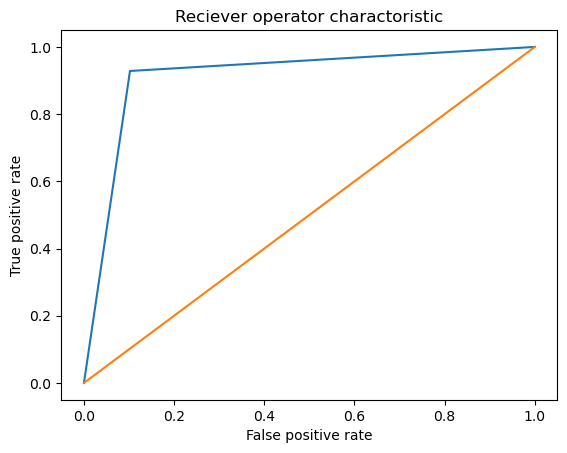

0.9131283324686029


In [539]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Model-1 with 91% accuracy and 90% area under the curve- Gradient boosting classifier.

# Model-II with select K-Best features selection method-

In [602]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


# Checking distribution of data-

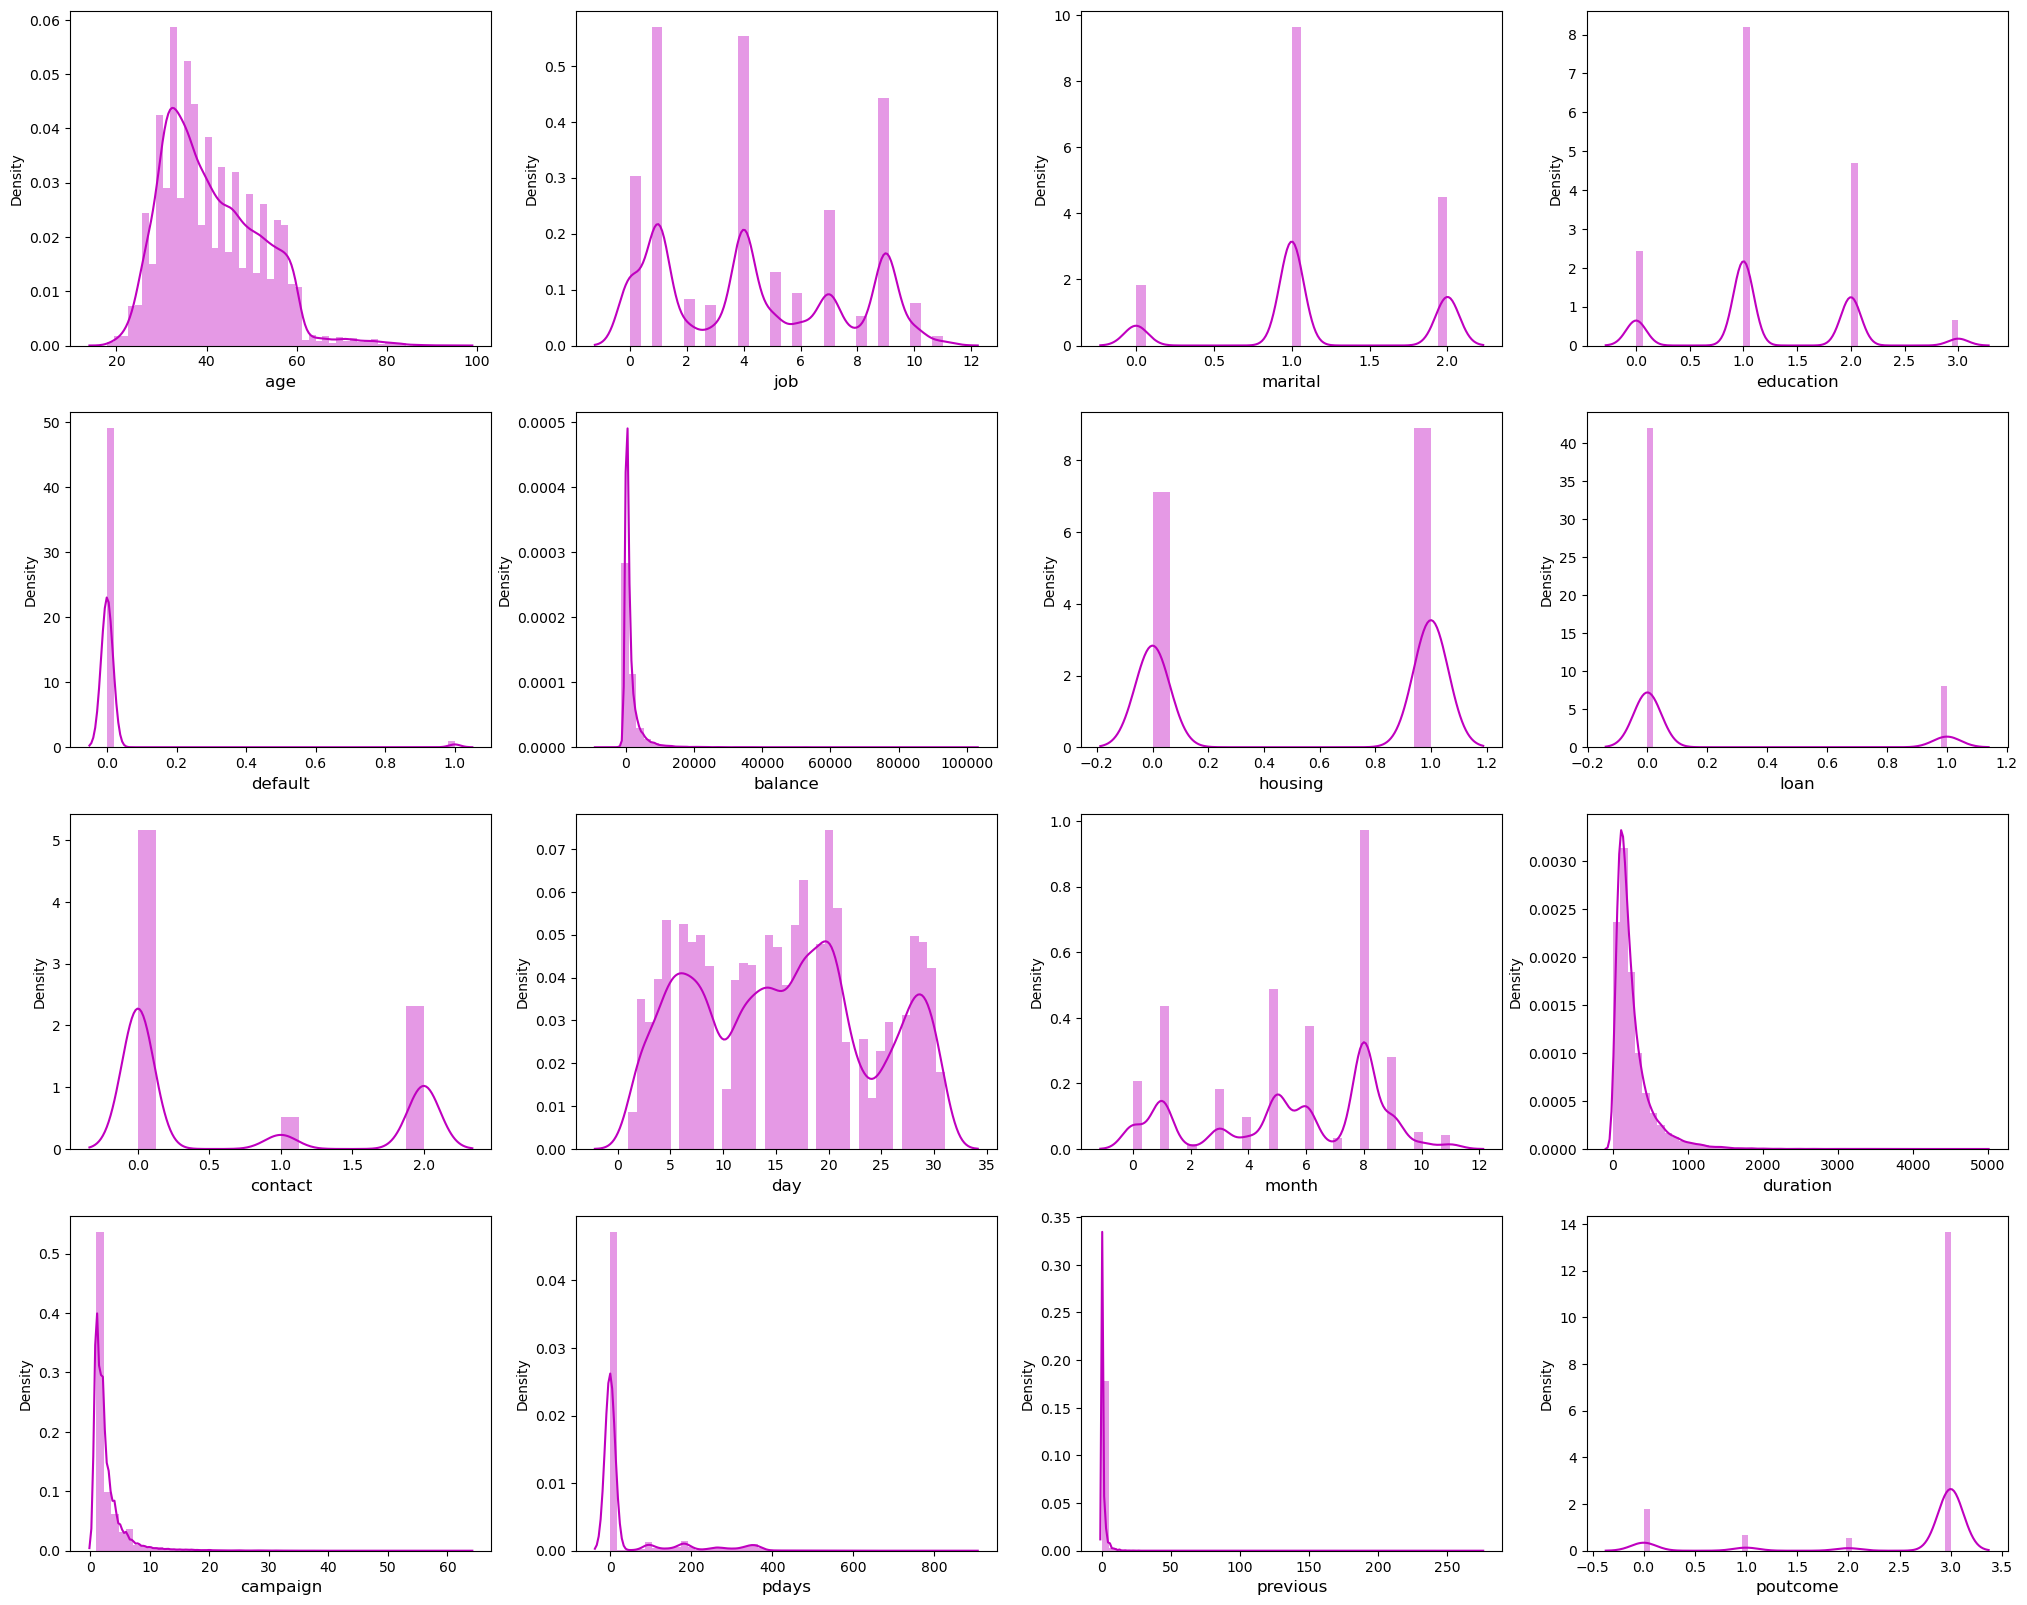

In [603]:
plt.figure(figsize=(25,20))  
plotnumber=1

for col in df.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col],color='m')  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()  

In [604]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [605]:
object_data_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [606]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


# Applying cube root method to remove skewness on continous data columns-

In [607]:
df['age']=np.cbrt(df['age'])

In [608]:
df['balance']=np.cbrt(df['balance'])

In [609]:
df['duration']=np.cbrt(df['duration'])

In [610]:
df['campaign']=np.cbrt(df['campaign'])

In [611]:
df['pdays']=np.cbrt(df['pdays'])

In [612]:
df['previous']=np.cbrt(df['previous'])

In [613]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

The skewness has been almost removed from the continous data columns.

In [614]:
#Lets check distribution of data again-

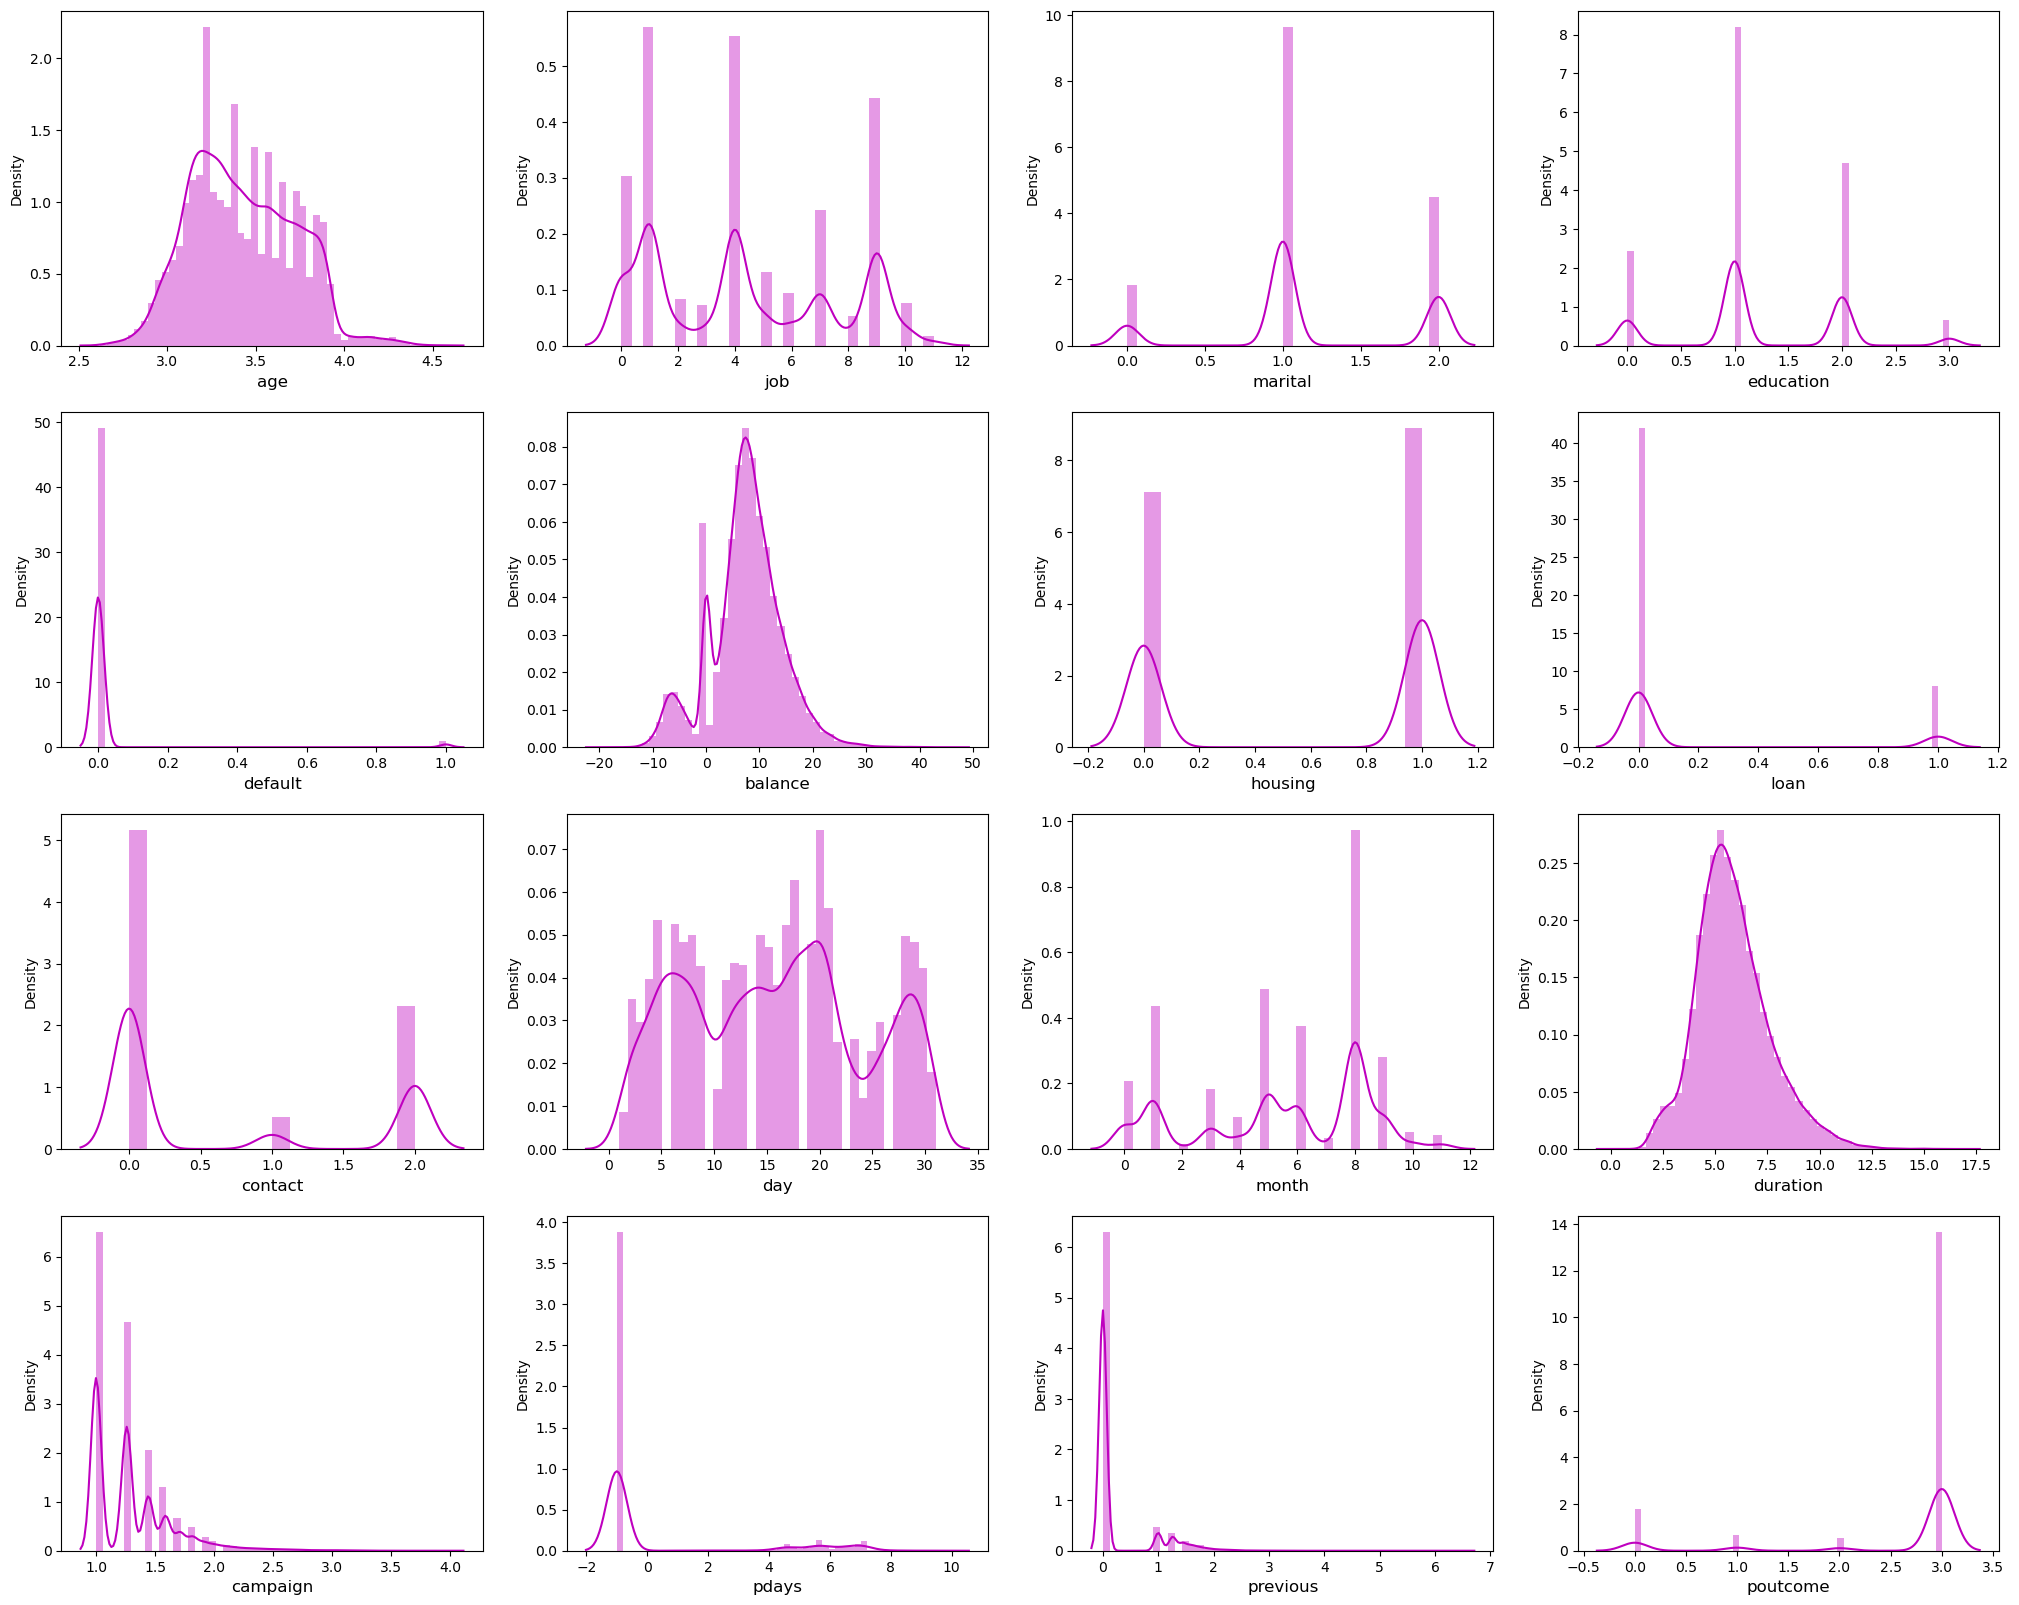

In [615]:
plt.figure(figsize=(25,20))  
plotnumber=1

for col in df.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col],color='m')  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

# Checking for outliers-

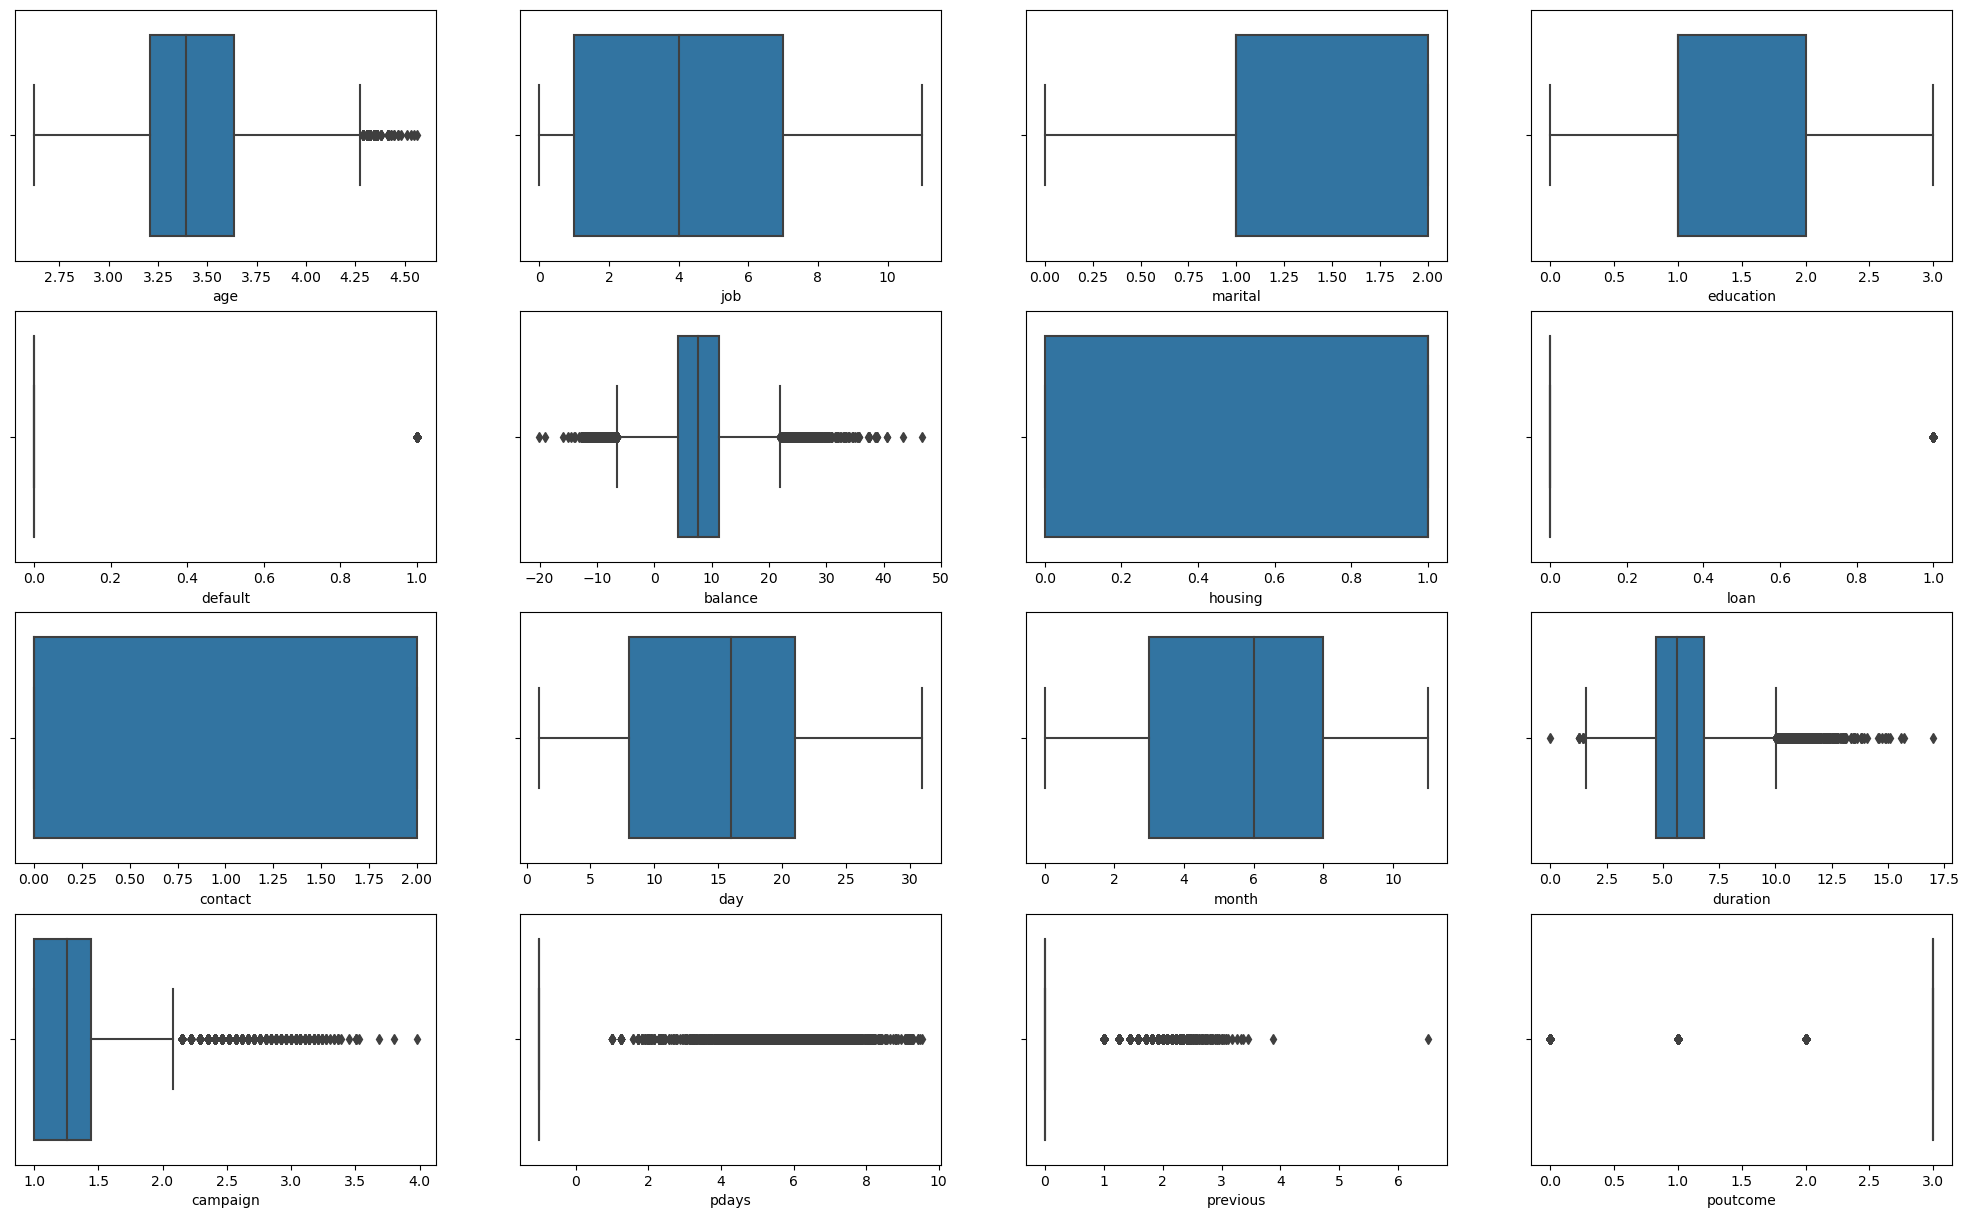

In [616]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in df.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show() 

1. Age,balance,duration,campaign,pdays,previous column has the outliers which we need to remove.

# Removing outliers-

In [617]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [618]:
age_high=(q3.age+(1.5*IQR.age))


index=np.where(df['age']> age_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.442250,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0.000000,3,0
31645,3.848501,9,1,1,0,6.082202,1,0,1,15,8,2.802039,1.912931,6.958943,2.289428,0,0


In [619]:
balance_high=(q3.balance+(1.5*IQR.balance))


index=np.where(df['balance']> balance_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.442250,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0.000000,3,0
31645,3.848501,9,1,1,0,6.082202,1,0,1,15,8,2.802039,1.912931,6.958943,2.289428,0,0


In [620]:
duration_high=(q3.duration+(1.5*IQR.duration))


index=np.where(df['duration']> duration_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.442250,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.000000,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0.000000,3,0


In [621]:
campaign_high=(q3.campaign+(1.5*IQR.campaign))


index=np.where(df['campaign']> campaign_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.442250,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.000000,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0.000000,3,0


In [622]:
pdays_high=(q3.pdays+(1.5*IQR.pdays))


index=np.where(df['pdays']> pdays_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
5,3.207534,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3,1


In [623]:
previous_high=(q3.previous+(1.5*IQR.previous))


index=np.where(df['previous']> previous_high)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
5,3.207534,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3,1


In [624]:
#Removing lower side outliers-

In [625]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

#lower side outliers= q1-(1.5*IQR)

In [626]:
balance_low=q1.balance-(1.5*IQR.balance)

index=np.where(df['balance']<balance_low)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
5,3.207534,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3,1


In [627]:
duration_low=q1.duration-(1.5*IQR.duration)

index=np.where(df['duration']<duration_low)

df=df.drop(df.index[index])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
5,3.207534,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3,1


In [628]:
data_loss=23104/31647
data_loss

0.7300534015862483

27% data loss happened during outliers removal.

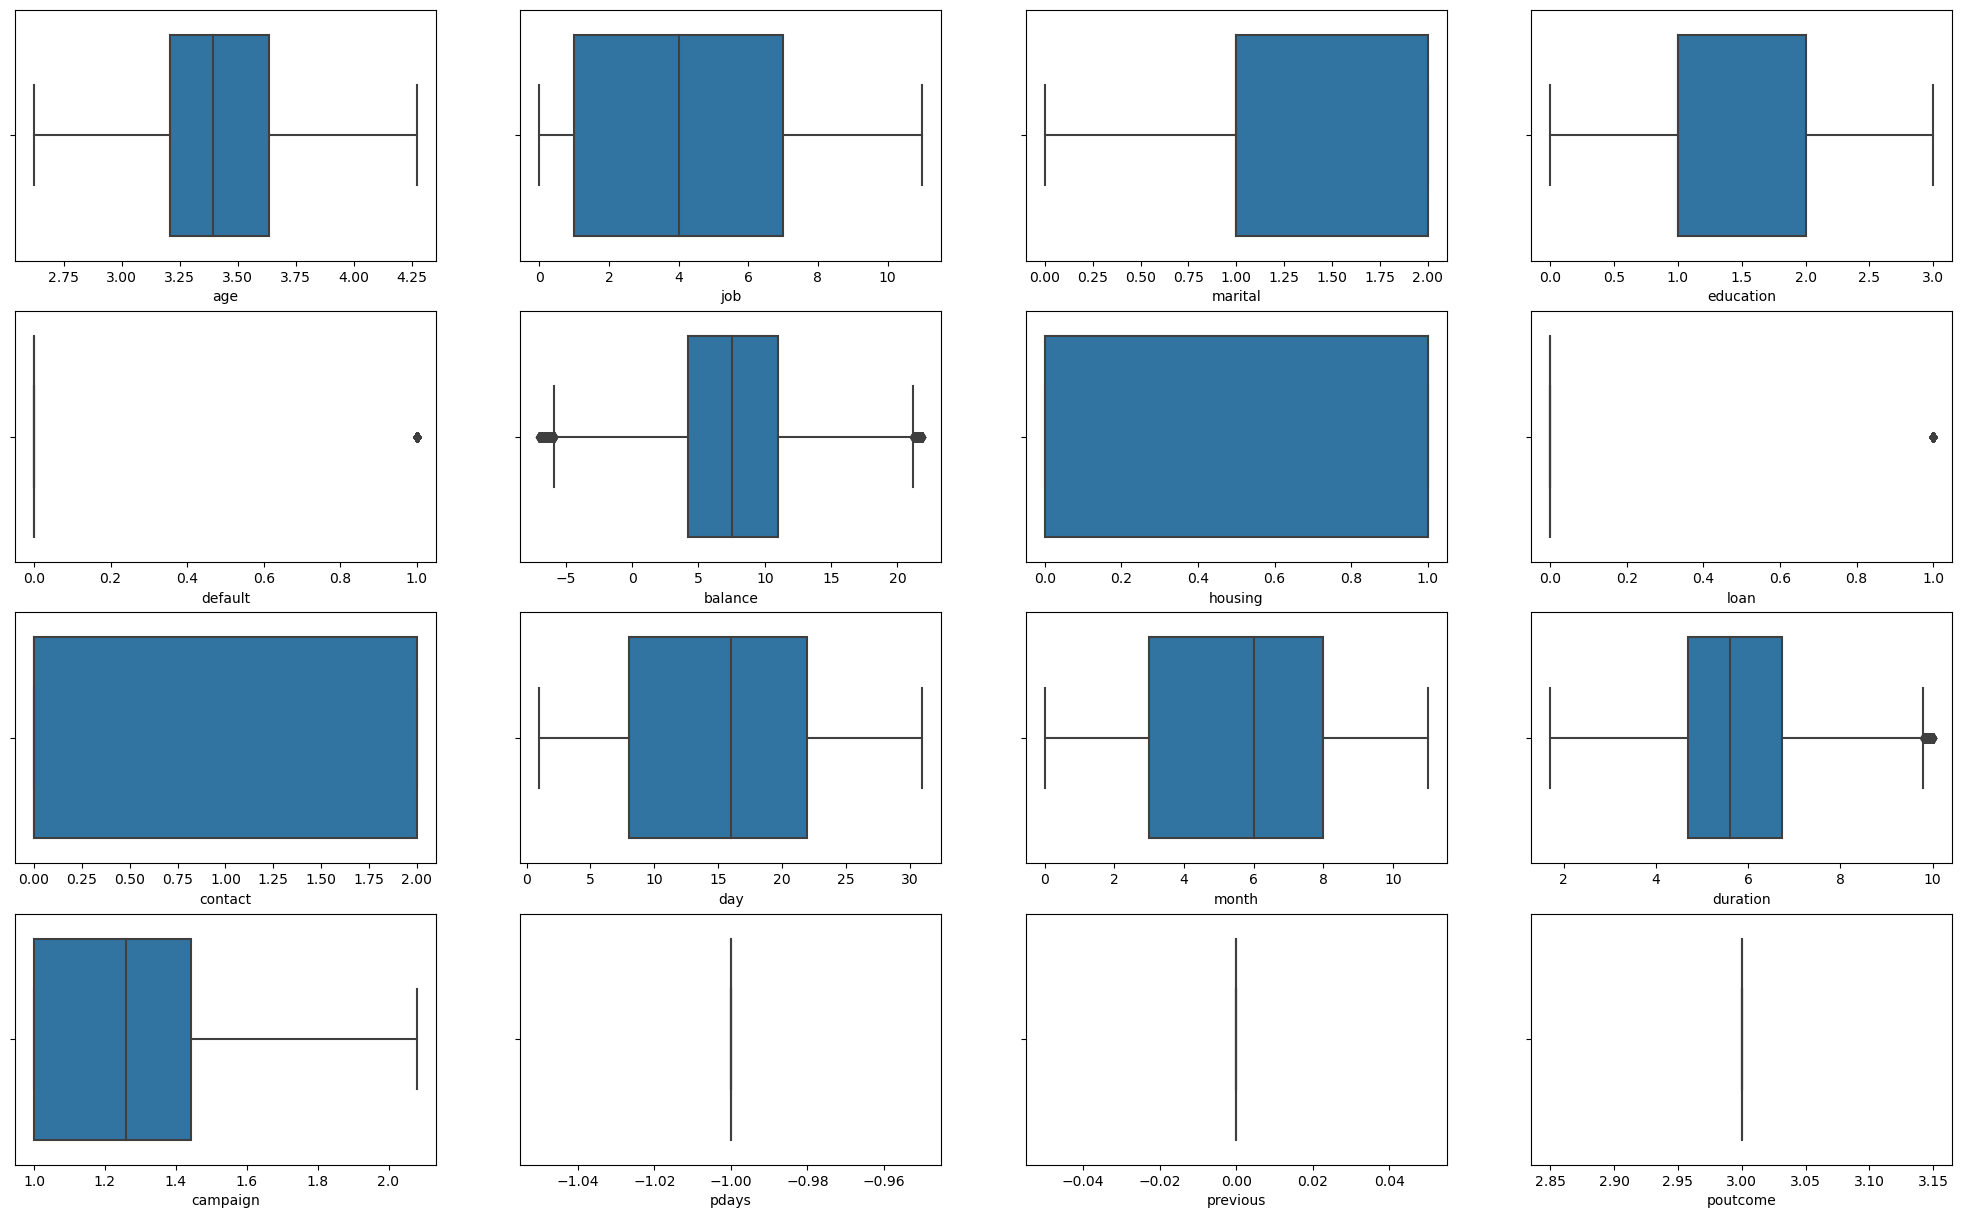

In [629]:
plt.figure(figsize=(25,15))
plotnumber=1

for col in df.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show() 

Almost outliers has been removed.

In [630]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.0,0.0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.0,0.0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.0,0.0,3,0
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.0,0.0,3,0
5,3.207534,4,2,2,0,0.000000,1,0,0,2,3,4.876999,1.442250,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.0,0.0,3,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.0,0.0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.0,0.0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.0,0.0,3,1


# Feature selection through select k-best method-

In [631]:
x=df.drop(columns=['subscribed'],axis=1)
y=df.subscribed

In [632]:
from sklearn.feature_selection import SelectKBest,f_classif

In [633]:
best_features=SelectKBest(score_func=f_classif,k=12) 

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(11,'score'))

          score feature_name
11  2751.258036     duration
8    458.786329      contact
6    314.471998      housing
5    168.432411      balance
12    90.172464     campaign
7     81.207670         loan
3     74.178337    education
2     42.531819      marital
10    38.043636        month
1     23.301360          job
9     16.469632          day


In [634]:
#lets just saperate these 12 features in a new variable.

In [635]:
new_df=df[['duration','contact','housing','balance','campaign','loan','education','marital','month','job','day','subscribed']]
new_df

,duration,contact,housing,balance,campaign,loan,education,marital,month,job,day,subscribed
0,3.530348,1,0,12.456918,1.259921,0,3,1,9,0,19,0
1,4.497941,0,0,1.442250,1.259921,0,1,1,5,11,20,0
2,6.214465,0,1,9.622603,1.000000,0,1,1,5,7,18,0
4,7.243156,0,1,4.918685,1.000000,0,1,1,3,9,4,0
5,4.876999,0,1,0.000000,1.442250,0,2,2,3,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.107233,2,0,14.371032,1.587401,0,1,2,6,4,20,0
31641,7.617412,2,0,10.939057,1.259921,0,2,2,6,9,6,0
31642,4.876999,0,1,0.000000,1.259921,0,2,2,8,4,12,0
31643,7.594363,0,0,7.243156,1.259921,1,2,0,6,4,5,1


In [636]:
x=new_df.drop(columns=['subscribed'],axis=1)
y=new_df.subscribed

In [637]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking for multicollinearity-

In [638]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,10.595619,duration
1,2.123309,contact
2,2.492129,housing
3,2.684713,balance
4,12.643971,campaign
5,1.205176,loan
6,3.665357,education
7,4.511958,marital
8,5.867403,month
9,2.804991,job


In [639]:
df.corr()['subscribed']

age          -0.012171
job           0.031743
marital       0.042868
education     0.056574
default      -0.012681
balance       0.085077
housing      -0.115886
loan         -0.059185
contact      -0.139544
day          -0.026691
month        -0.040547
duration      0.326218
campaign     -0.062354
pdays              NaN
previous           NaN
poutcome           NaN
subscribed    1.000000
Name: subscribed, dtype: float64

here we can see that vif value is high for duration & campaign column so i will drop campaign column because it has less correlation with target variable.

In [640]:
df=new_df.drop(columns=['campaign'],axis=1)
df

,duration,contact,housing,balance,loan,education,marital,month,job,day,subscribed
0,3.530348,1,0,12.456918,0,3,1,9,0,19,0
1,4.497941,0,0,1.442250,0,1,1,5,11,20,0
2,6.214465,0,1,9.622603,0,1,1,5,7,18,0
4,7.243156,0,1,4.918685,0,1,1,3,9,4,0
5,4.876999,0,1,0.000000,0,2,2,3,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
31640,3.107233,2,0,14.371032,0,1,2,6,4,20,0
31641,7.617412,2,0,10.939057,0,2,2,6,9,6,0
31642,4.876999,0,1,0.000000,0,2,2,8,4,12,0
31643,7.594363,0,0,7.243156,1,2,0,6,4,5,1


In [641]:
x=df.drop(columns=['subscribed'],axis=1)
y=df.subscribed

In [642]:
#Cheking vif again-

In [643]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,8.412895,duration
1,2.109670,contact
2,2.478475,housing
3,2.638574,balance
4,1.197603,loan
5,3.577120,education
6,4.363173,marital
7,5.852733,month
8,2.745794,job
9,4.075243,day


Now VIF values are under acceptable limit.

# Feature scaling-

In [644]:
from sklearn.preprocessing import StandardScaler

In [645]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [646]:
x_scaled

array([[-1.4353591 ,  0.25550465, -1.08138322, ...,  1.20526859,
        -1.31869665,  0.37279604],
       [-0.81261756, -0.80889841, -1.08138322, ..., -0.17501471,
         2.02824034,  0.49286239],
       [ 0.29213456, -0.80889841,  0.92474155, ..., -0.17501471,
         0.81117234,  0.25272969],
       ...,
       [-0.56865668, -0.80889841,  0.92474155, ...,  0.86019776,
        -0.10162865, -0.46766841],
       [ 1.18023514, -0.80889841, -1.08138322, ...,  0.17005611,
        -0.10162865, -1.30813286],
       [-1.56287302, -0.80889841, -1.08138322, ..., -1.55529801,
        -0.10162865, -1.06800016]])

In [647]:
#treating imbalanced data in target variable-

In [648]:
y.value_counts()

0    21234
1     1870
Name: subscribed, dtype: int64

In [649]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_scaled,y=sm.fit_resample(x_scaled,y)

In [650]:
y.value_counts()

0    21234
1    21234
Name: subscribed, dtype: int64

# Model building-

In [651]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)               

Best accuracy is 0.9573816811867201 at random state 131


In [652]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=maxrs)

In [653]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [654]:
#Random forest-

In [655]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [656]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:95.65%


 Test classification report
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      6329
           1       0.94      0.98      0.96      6412

    accuracy                           0.96     12741
   macro avg       0.96      0.96      0.96     12741
weighted avg       0.96      0.96      0.96     12741



In [657]:
#Logistic regression-

In [658]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [659]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 79.95%
=====================Test Result=====================
accuracy_score:79.98%


 Test classification report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      6329
           1       0.80      0.80      0.80      6412

    accuracy                           0.80     12741
   macro avg       0.80      0.80      0.80     12741
weighted avg       0.80      0.80      0.80     12741



In [660]:
#Support vector classifier-

In [661]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [662]:
metric_score(sv,x_train,x_test,y_train,y_test,train=True) 
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.61%
=====================Test Result=====================
accuracy_score:86.41%


 Test classification report
               precision    recall  f1-score   support

           0       0.91      0.81      0.85      6329
           1       0.83      0.92      0.87      6412

    accuracy                           0.86     12741
   macro avg       0.87      0.86      0.86     12741
weighted avg       0.87      0.86      0.86     12741



In [663]:
#GradientBoostingClassifier-

In [664]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [665]:
metric_score(gb,x_train,x_test,y_train,y_test,train=True) 
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 91.19%
=====================Test Result=====================
accuracy_score:91.30%


 Test classification report
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      6329
           1       0.89      0.94      0.92      6412

    accuracy                           0.91     12741
   macro avg       0.91      0.91      0.91     12741
weighted avg       0.91      0.91      0.91     12741



In [666]:
#AdaBoostClassifier-

In [667]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [668]:
metric_score(ab,x_train,x_test,y_train,y_test,train=True) 
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 88.15%
=====================Test Result=====================
accuracy_score:88.20%


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6329
           1       0.88      0.89      0.88      6412

    accuracy                           0.88     12741
   macro avg       0.88      0.88      0.88     12741
weighted avg       0.88      0.88      0.88     12741



In [669]:
#BaggingClassifier-

In [670]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [671]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True) 
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 99.71%
=====================Test Result=====================
accuracy_score:94.69%


 Test classification report
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6329
           1       0.94      0.95      0.95      6412

    accuracy                           0.95     12741
   macro avg       0.95      0.95      0.95     12741
weighted avg       0.95      0.95      0.95     12741



In [672]:
#ExtraTreeClassifier-

In [673]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [674]:
metric_score(et,x_train,x_test,y_train,y_test,train=True) 
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:96.43%


 Test classification report
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      6329
           1       0.94      0.99      0.97      6412

    accuracy                           0.96     12741
   macro avg       0.97      0.96      0.96     12741
weighted avg       0.97      0.96      0.96     12741



In [675]:
#Cross validation-

In [676]:
from sklearn.model_selection import cross_val_score

In [678]:
score=cross_val_score(rf,x_scaled,y)
print(score)
print(score.mean())

[0.92712503 0.95891217 0.96362138 0.96432356 0.95996703]
0.9547898349562572


In [679]:
#logistic regression-

In [680]:
score=cross_val_score(lr,x_scaled,y)
print(score)
print(score.mean())

[0.79220626 0.79762185 0.7982105  0.80760626 0.80489815]
0.8001086061788415


In [681]:
#SVC-

In [682]:
score=cross_val_score(sv,x_scaled,y)
print(score)
print(score.mean())

[0.85342595 0.86225571 0.86107841 0.87012834 0.86553632]
0.8624849461894282


In [683]:
#Gradientboostingclassifier-

In [684]:
score=cross_val_score(gb,x_scaled,y)
print(score)
print(score.mean())

[0.87014363 0.9145279  0.91346833 0.91805016 0.91581302]
0.9064006089753107


In [685]:
#Adaboostingclassifier-

In [686]:
score=cross_val_score(ab,x_scaled,y)
print(score)
print(score.mean())

[0.83988698 0.88909819 0.88062162 0.88673025 0.88861415]
0.8769902365057988


In [687]:
#Baggingclassifier-

In [688]:
score=cross_val_score(bc,x_scaled,y)
print(score)
print(score.mean())

[0.9024017  0.9504356  0.95173063 0.95513953 0.94984105]
0.9419097005079407


In [689]:
#Extratreeclassifier-

In [690]:
score=cross_val_score(et,x_scaled,y)
print(score)
print(score.mean())

[0.9590299  0.96503414 0.96738874 0.96832686 0.96314612]
0.9645851535902461


From the above model performances i am selecting gradient boosting classifier as my best model as i am getting almost 92% train,test accuracy with 90% cross validation score.
so this has been my generalised model.

# Hyper parameter tunning-

In [691]:
from sklearn.model_selection import GridSearchCV

In [692]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [695]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[3,5],
            'n_estimators':[100,200],'min_samples_leaf':[2,3]}

In [696]:
gs=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [697]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 3],
                         'n_estimators': [100, 200],
                         'random_state': [10, 20, 40]})

In [698]:
gs.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'n_estimators': 200,
 'random_state': 20}

In [705]:
final_model=GradientBoostingClassifier(criterion='friedman_mse',max_depth=9,loss='deviance',n_estimators=200,min_samples_leaf= 3,random_state=20)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [706]:
accuracy_score(y_test,pred)

0.9617769405855113

Accuracy of the model increased to 96% from 91% through hyperparameter tunnning.

# Saving the model-

In [709]:
import joblib
joblib.dump(final_model,'Bank marketing-2')

['Bank marketing-2']

In [710]:
model=joblib.load('Bank marketing-2')

In [711]:
#prediction-

In [712]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 0, 1])

In [713]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
12736,0,1
12737,1,1
12738,0,0
12739,0,0


# AUC & ROC accuracy-

In [714]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

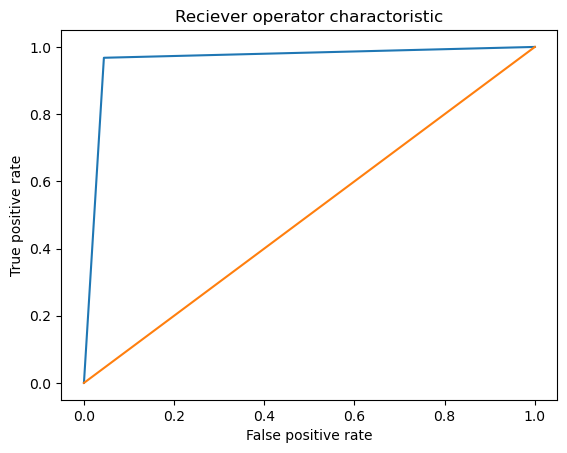

0.9617379923506122


In [715]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

The area under the curve for the second model is 96%

# Model-III (With principle component analysis)-

 Getting the data frame after removing skewness annd outliers from the above-

In [84]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.00000,1.442250,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.00000,1.442250,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.00000,1.442250,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.44225,1.259921,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.00000,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.000000,0.00000,1.442250,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.00000,1.442250,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.00000,1.442250,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.00000,1.442250,1


In [85]:
df=df1
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0.00000,1.442250,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0.00000,1.442250,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0.00000,1.442250,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,1.44225,1.259921,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0.00000,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,3.503398,4,2,1,0,14.371032,0,0,2,20,6,3.107233,1.587401,-1.000000,0.00000,1.442250,0
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0.00000,1.442250,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0.00000,1.442250,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0.00000,1.442250,1


In [86]:
x=df.drop(columns=['subscribed'])
y=df.subscribed

# Feature scaling-

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Applying Principle component method-

In [89]:
from sklearn.decomposition import PCA 

In [90]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.64712726,  0.34085831, -0.76826826, ...,  0.54852867,
        -0.09743139, -0.04145103],
       [-0.47934445,  1.53104465,  0.50110655, ..., -0.60701906,
        -0.06578724, -0.00682714],
       [-0.29531349,  0.10994337,  1.16609111, ..., -0.6438737 ,
        -0.01341548,  0.03124432],
       ...,
       [-0.46665647, -0.21445359,  2.19665204, ...,  0.9405745 ,
        -0.04493237,  0.00435926],
       [-0.40417725,  0.61726047, -1.89553439, ..., -0.2341763 ,
        -0.10038206, -0.01737662],
       [-0.2416648 ,  2.25966616,  1.17917728, ..., -0.01238721,
        -0.06299885,  0.00383717]])

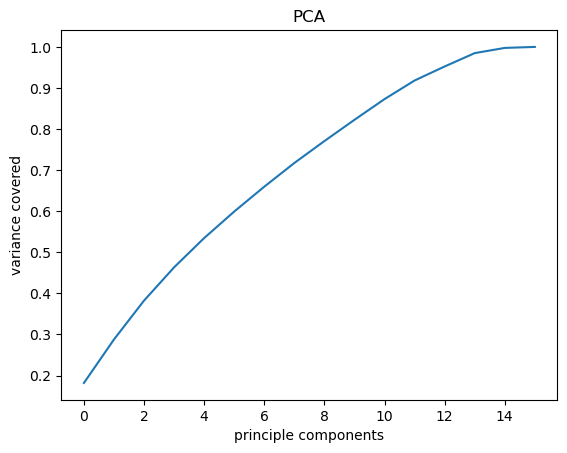

In [91]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   
plt.xlabel('principle components') 
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

from the above graph it can be seen that 13 new components would cover our maximum variance.

In [92]:
pca=PCA(n_components=13)
new_components=pca.fit_transform(x_scaled)

In [93]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.647127,0.340858,-0.768268,-1.290024,-0.906167,1.380767,0.578832,-0.294095,2.171845,2.011505,-0.144246,-0.915745,0.216123
1,-0.479344,1.531045,0.501107,0.566057,-0.367067,0.904475,0.375339,-0.009739,-0.368177,-1.809937,-0.585430,-0.229492,0.993419
2,-0.295313,0.109943,1.166091,-0.341384,0.364268,-0.151279,-0.453317,0.008967,-0.259160,-0.814472,-1.009859,1.351915,0.535126
3,3.098218,0.426372,-1.874543,-1.439803,1.372693,1.023029,-2.496664,0.663982,0.617479,0.729352,0.059004,-0.427512,0.331565
4,-0.214141,0.410573,0.959818,-0.135680,1.804033,-0.010244,0.271220,0.164725,-1.570380,-0.738514,-0.990764,1.036133,0.219287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,-0.988049,0.427527,0.188429,-0.917066,-1.899233,-0.054355,1.209380,0.037717,0.950559,-0.345474,1.658522,-0.534415,-0.732781
28120,-0.638814,0.733589,1.673670,-1.246961,1.081167,1.172468,0.192205,0.276157,-0.686201,0.091104,1.541065,-0.954463,-0.681364
28121,-0.466656,-0.214454,2.196652,0.542900,-0.277390,0.032360,0.750905,0.016017,-0.113190,0.556108,-1.076629,-0.233577,0.767386
28122,-0.404177,0.617260,-1.895534,0.341882,2.087343,0.781255,-0.685574,-1.801416,-0.388575,1.502679,0.390867,-0.392274,0.908616


# Oversampling-

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

In [96]:
sm=SMOTE()
princi_comp,y=sm.fit_resample(princi_comp,y)

In [97]:
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

# Model building-

In [98]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.9343624249620688 at random state 10


In [100]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=.30, random_state=maxrs)

In [101]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [102]:
#logistic regression-

In [103]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [104]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 80.97%
/n=====================Test Result=====================
accuracy_score: 82.10%
confusion matrix is: 
[[6078 1451]
 [1263 6367]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7529
           1       0.81      0.83      0.82      7630

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159



In [105]:
# Random forest-

In [106]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
metric_score(rf,x_train,x_test,y_train,y_test, train=True)
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 93.44%
confusion matrix is: 
[[6753  776]
 [ 219 7411]]


 Test classification report
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      7529
           1       0.91      0.97      0.94      7630

    accuracy                           0.93     15159
   macro avg       0.94      0.93      0.93     15159
weighted avg       0.94      0.93      0.93     15159



In [108]:
#SupportVectorMachineClassifier-

In [109]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [110]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 86.91%
/n=====================Test Result=====================
accuracy_score: 86.71%
confusion matrix is: 
[[6188 1341]
 [ 673 6957]]


 Test classification report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      7529
           1       0.84      0.91      0.87      7630

    accuracy                           0.87     15159
   macro avg       0.87      0.87      0.87     15159
weighted avg       0.87      0.87      0.87     15159



In [111]:
#GradientBoostingClassifier-

In [112]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [113]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 84.16%
/n=====================Test Result=====================
accuracy_score: 84.08%
confusion matrix is: 
[[6084 1445]
 [ 968 6662]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      7529
           1       0.82      0.87      0.85      7630

    accuracy                           0.84     15159
   macro avg       0.84      0.84      0.84     15159
weighted avg       0.84      0.84      0.84     15159



In [114]:
#AdaBoostClassifier-

In [115]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [116]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 81.37%
/n=====================Test Result=====================
accuracy_score: 81.84%
confusion matrix is: 
[[6087 1442]
 [1311 6319]]


 Test classification report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      7529
           1       0.81      0.83      0.82      7630

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159



In [117]:
#BaggingClassifier-

In [118]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [119]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.66%
/n=====================Test Result=====================
accuracy_score: 91.70%
confusion matrix is: 
[[6769  760]
 [ 498 7132]]


 Test classification report
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      7529
           1       0.90      0.93      0.92      7630

    accuracy                           0.92     15159
   macro avg       0.92      0.92      0.92     15159
weighted avg       0.92      0.92      0.92     15159



In [120]:
#ExtraTreeClassifier-

In [121]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [122]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 94.95%
confusion matrix is: 
[[6929  600]
 [ 165 7465]]


 Test classification report
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      7529
           1       0.93      0.98      0.95      7630

    accuracy                           0.95     15159
   macro avg       0.95      0.95      0.95     15159
weighted avg       0.95      0.95      0.95     15159



In [123]:
#Decision Tree Classifier-

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [126]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 86.80%
confusion matrix is: 
[[6357 1172]
 [ 829 6801]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      7529
           1       0.85      0.89      0.87      7630

    accuracy                           0.87     15159
   macro avg       0.87      0.87      0.87     15159
weighted avg       0.87      0.87      0.87     15159



# Cross validation-

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [129]:
#Logistic regression-

In [130]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [131]:
score(lr,princi_comp,y)

[0.80476944 0.81367504 0.81288344 0.82266205 0.80890648]
cross validation score is:- 0.8125792908872043


In [132]:
# Random forest-

In [133]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
score(rf,princi_comp,y)

[0.9338017  0.93409856 0.93261429 0.93913904 0.93300346]
cross validation score is:- 0.9345314099050803


In [135]:
#SupportVectorMachineClassifier-

In [136]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [137]:
score(sv,princi_comp,y)

[0.85226598 0.86305165 0.8627548  0.87115289 0.86818407]
cross validation score is:- 0.8634818788237067


In [138]:
#GradientBoostingClassifier-

In [139]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [140]:
score(gb,princi_comp,y)

[0.82673659 0.83880863 0.83415793 0.84641267 0.84057397]
cross validation score is:- 0.8373379573845294


In [141]:
#AdaBoostClassifier-

In [142]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [143]:
score(ab,princi_comp,y)

[0.8008114  0.81337819 0.81446665 0.82553191 0.8108857 ]
cross validation score is:- 0.8130147717715227


In [144]:
#BaggingClassifier-

In [145]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [146]:
score(bc,princi_comp,y)

[0.9159905  0.91935484 0.91796952 0.92271153 0.91914894]
cross validation score is:- 0.9190350655148449


In [147]:
#ExtraTreeClassifier-

In [148]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [149]:
score(et,princi_comp,y)

[0.94854542 0.94874332 0.94824857 0.95319149 0.94854033]
cross validation score is:- 0.9494538241008496


In [150]:
#DecisionTreeClassifier

In [151]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [152]:
score(dt,princi_comp,y)

[0.87858698 0.88165446 0.8757174  0.88104899 0.87857496]
cross validation score is:- 0.8791165569750354


Here we got 86% train & test accuracy and 86% cross validation score with SVC model. so i will take svc model for hyperparameter 
tunning to increase its accuracy.

# Hyperparameter tunning-

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid={'C':[1,2,3],'random_state': [10,20],'degree':[1,2],'kernel' : ['linear', 'poly'],'gamma' : ['scale', 'auto'],'max_iter':[-1,1]}

In [155]:
gs=GridSearchCV(SVC(),param_grid,cv=5)

In [ ]:
gs.fit(x_train,y_train)

In [ ]:
gs.best_params_

In [182]:
final_model=SVC(C=4,
 degree=7,
 gamma='scale',
 kernel= 'poly',
 max_iter= -1,
 random_state= 400)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [183]:
accuracy_score(y_test,pred)

0.8846889636519559

The accuracy increased to 88.4% with support vector classifier model.

# Saving model-

In [184]:
import joblib
joblib.dump(final_model,'Bank marketing-3')

['Bank marketing-3']

In [185]:
model=joblib.load('Bank marketing-3')

In [186]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, ..., 1, 1, 0])

In [187]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
15154,0,0
15155,0,0
15156,1,1
15157,1,1


# Plotting AUC & ROC curve-

In [188]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

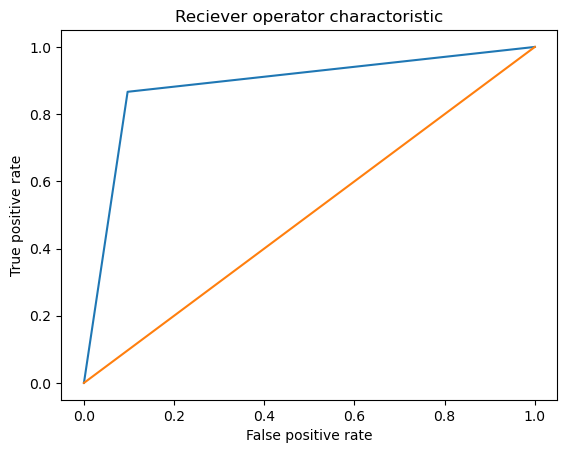

0.8848113115089979


In [189]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

The area under the curve is 88.4% with support vector classifier model.

# Applying model on test data to get the prediction-

In [298]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [300]:
df.shape

(13564, 17)

The data set contains 13564 rows and 16 columns.

In [301]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

There are few columns which contains the object data which we need to encode going further.

In [302]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<AxesSubplot:>

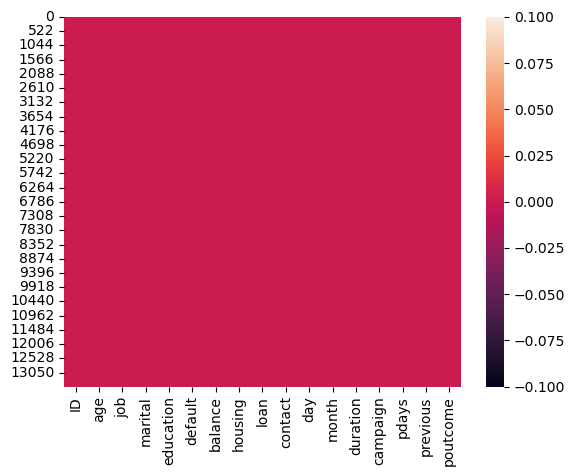

In [303]:
sns.heatmap(df.isnull())

There are no null values presesnt in the data set.

In [304]:
object_data_col=[]

for i in df.columns:
    if df[i].dtypes == 'object':
        object_data_col.append(i)

In [305]:
object_data_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

separated the object data columns from the dataset.

In [306]:
for i in object_data_col:
    print(i,'-' ,df[i].nunique())

job - 12
marital - 3
education - 4
default - 2
housing - 2
loan - 2
contact - 3
month - 12
poutcome - 4


In [307]:
df[object_data_col]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,services,married,secondary,no,yes,no,cellular,may,unknown
1,retired,divorced,primary,no,no,no,telephone,jul,unknown
2,self-employed,single,tertiary,no,yes,no,unknown,may,unknown
3,services,single,primary,no,yes,no,telephone,may,unknown
4,blue-collar,divorced,secondary,no,no,yes,unknown,jul,unknown
...,...,...,...,...,...,...,...,...,...
13559,management,married,tertiary,no,no,no,cellular,aug,unknown
13560,blue-collar,married,primary,no,yes,no,unknown,jun,unknown
13561,retired,married,primary,no,yes,no,cellular,jan,unknown
13562,admin.,single,secondary,no,no,no,cellular,nov,success


# Encoding of object data-

In [308]:
from sklearn.preprocessing import LabelEncoder

In [309]:
x= LabelEncoder()

In [310]:
df['job']=x.fit_transform(df['job'])

In [311]:
df['marital']=x.fit_transform(df['marital'])

In [312]:
df['education']=x.fit_transform(df['education'])

In [313]:
df['default']=x.fit_transform(df['default'])

In [314]:
df['housing']=x.fit_transform(df['housing'])

In [315]:
df['loan']=x.fit_transform(df['loan'])

In [316]:
df['contact']=x.fit_transform(df['contact'])

In [317]:
df['month']=x.fit_transform(df['month'])

In [318]:
df['poutcome']=x.fit_transform(df['poutcome'])

In [319]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [320]:
import warnings
warnings.filterwarnings('ignore')

In [321]:
#separating the continous data columns only-

In [322]:
y=df[['age','balance','day','campaign','pdays','previous','poutcome','duration']]

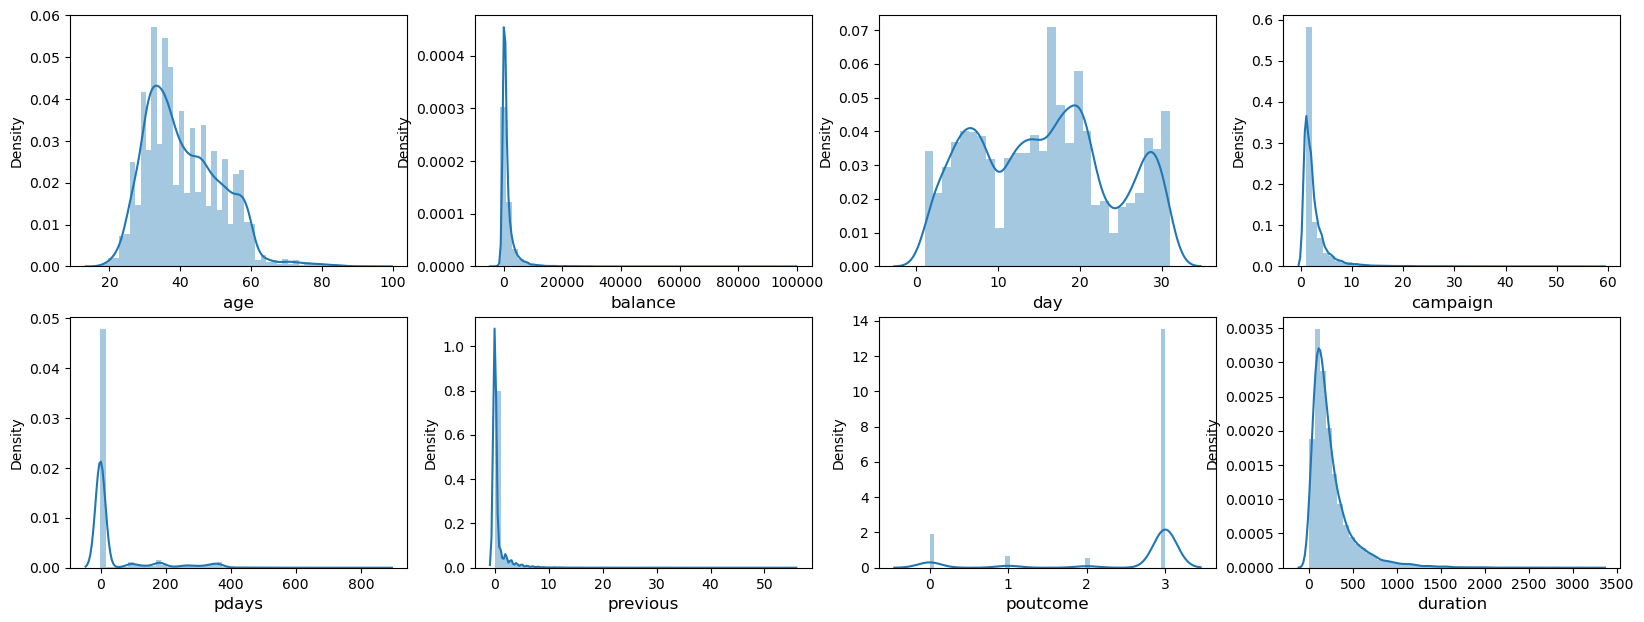

In [323]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in y:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()   

In [324]:
df[['age','balance','day','campaign','pdays','previous','poutcome','duration']].skew()

age         0.692404
balance     9.165015
day         0.106806
campaign    4.958236
pdays       2.555601
previous    8.704583
poutcome   -1.921847
duration    3.017221
dtype: float64

# Applying cube root method to remove skewness on continous data columns-

In [325]:
df['age']=np.cbrt(df['age'])

In [326]:
df['balance']=np.cbrt(df['balance'])

In [327]:
df['duration']=np.cbrt(df['duration'])

In [328]:
df['campaign']=np.cbrt(df['campaign'])

In [329]:
df['pdays']=np.cbrt(df['pdays'])

In [330]:
df['previous']=np.cbrt(df['previous'])

# Skewness removed from the continous data columns.

In [331]:
#Checking data distribution after removal of skewness from the data-

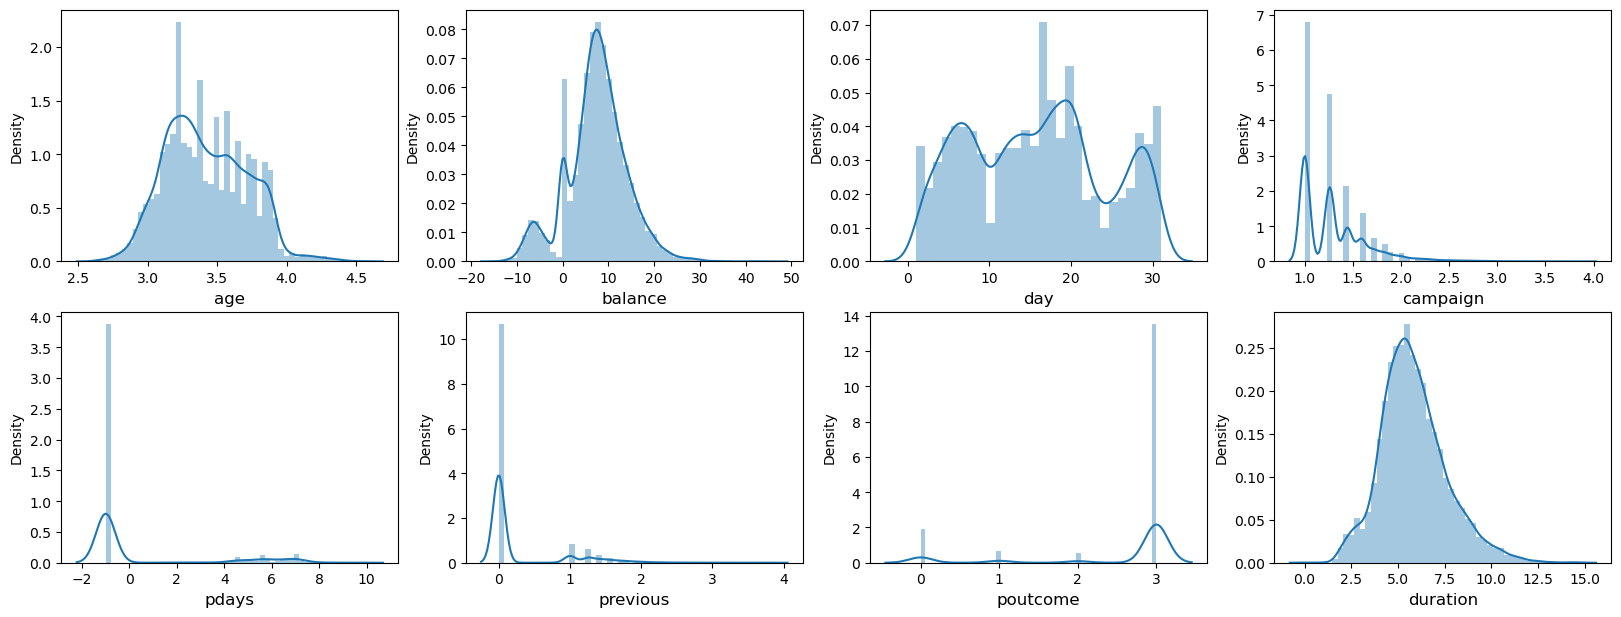

In [332]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in y.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

# Checking for outliers-

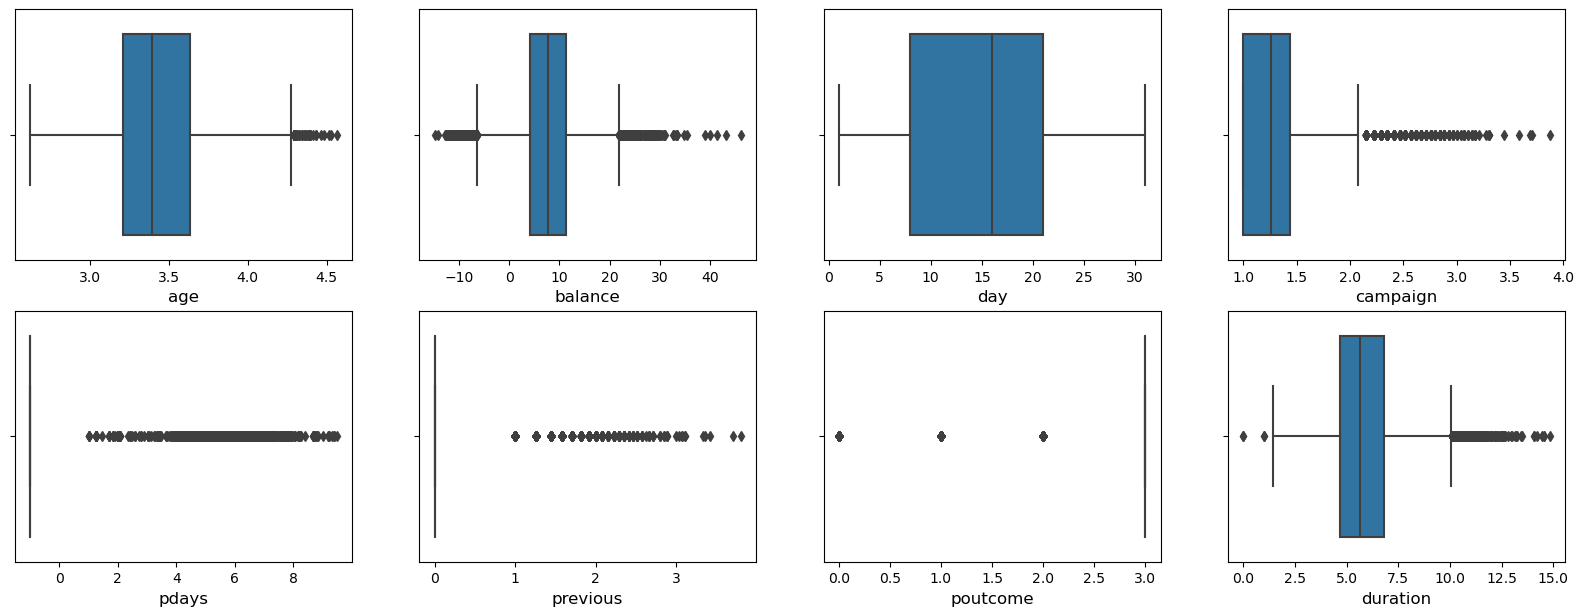

In [333]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in y.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

# Removing outliers through Z-score method-

In [334]:
from scipy.stats import zscore
import numpy as np

In [335]:
z=np.abs(zscore(df))
z.shape

(13564, 17)

In [336]:
threshold=3
print(np.where(z>3))

(array([   28,    52,   113,   117,   131,   140,   149,   173,   231,
         235,   258,   270,   307,   315,   323,   346,   369,   380,
         388,   393,   423,   428,   432,   437,   453,   468,   475,
         478,   537,   547,   548,   558,   566,   566,   577,   598,
         634,   668,   677,   693,   704,   709,   749,   804,   809,
         818,   823,   858,   864,   895,   903,   936,   982,   994,
        1029,  1031,  1033,  1042,  1048,  1049,  1062,  1075,  1086,
        1103,  1136,  1167,  1242,  1250,  1257,  1261,  1272,  1289,
        1316,  1319,  1330,  1368,  1374,  1377,  1384,  1394,  1399,
        1407,  1413,  1418,  1440,  1465,  1473,  1515,  1530,  1548,
        1557,  1571,  1571,  1592,  1605,  1609,  1677,  1693,  1707,
        1715,  1743,  1766,  1798,  1815,  1852,  1873,  1874,  1929,
        1978,  1988,  2030,  2038,  2043,  2052,  2055,  2056,  2071,
        2072,  2081,  2122,  2127,  2133,  2138,  2201,  2202,  2203,
        2225,  2239

In [337]:
df1=df[( z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(13564, 17)
(12709, 17)


In [338]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
data_loss

6.303450309643173

# Featutre scaling-

In [339]:
#Separating the features as per my model for prediction- 

In [340]:
df=df1[['duration','contact','housing','balance','loan','education','marital','month','job','day']]
df

,duration,contact,housing,balance,loan,education,marital,month,job,day
0,2.714418,0,1,4.904868,0,1,1,8,7,15
1,7.191966,1,0,14.072751,0,0,0,5,5,1
2,8.776383,2,1,5.241483,0,2,2,8,6,16
3,4.020726,1,1,15.573360,0,0,2,8,7,13
4,4.805896,2,0,-8.900130,1,1,0,5,1,3
...,...,...,...,...,...,...,...,...,...,...
13559,5.289572,0,0,3.556893,0,2,1,1,4,28
13560,5.406120,2,1,13.163613,0,0,1,6,1,20
13561,5.142563,0,1,6.580844,0,0,1,4,5,29
13562,5.924992,0,0,7.741753,0,1,2,9,0,9


In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [343]:
x_scaled

array([[-1.86729158, -0.70575292,  0.88867763, ...,  0.82741678,
         0.80659586, -0.07541173],
       [ 0.81522761,  0.40845998, -1.12526744, ..., -0.16797399,
         0.19726803, -1.77557744],
       [ 1.76445858,  1.52267289,  0.88867763, ...,  0.82741678,
         0.50193194,  0.04602868],
       ...,
       [-0.41257887, -0.70575292,  0.88867763, ..., -0.49977091,
         0.19726803,  1.62475398],
       [ 0.05617777, -0.70575292, -1.12526744, ...,  1.1592137 ,
        -1.32605155, -0.80405418],
       [ 0.68385378, -0.70575292,  0.88867763, ...,  0.82741678,
        -1.32605155, -1.1683754 ]])

In [292]:
import joblib

In [293]:
#Importing my best model from above for prediction-

In [294]:
model=joblib.load('Bank marketing-2')

In [295]:
#prediction-

In [296]:
prediction=model.predict(x_scaled)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [297]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,1
1,1
2,1
3,1
4,0
...,...
12704,1
12705,0
12706,1
12707,1


1 means they will subscribe 0 means they wont subscribe for term deposit.

# Prediction-II (Without removing the outliers)-

In [344]:
df

,duration,contact,housing,balance,loan,education,marital,month,job,day
0,2.714418,0,1,4.904868,0,1,1,8,7,15
1,7.191966,1,0,14.072751,0,0,0,5,5,1
2,8.776383,2,1,5.241483,0,2,2,8,6,16
3,4.020726,1,1,15.573360,0,0,2,8,7,13
4,4.805896,2,0,-8.900130,1,1,0,5,1,3
...,...,...,...,...,...,...,...,...,...,...
13559,5.289572,0,0,3.556893,0,2,1,1,4,28
13560,5.406120,2,1,13.163613,0,0,1,6,1,20
13561,5.142563,0,1,6.580844,0,0,1,4,5,29
13562,5.924992,0,0,7.741753,0,1,2,9,0,9


Got the data set from above after encoding the object data & removal of skewness.

In [345]:
df=df[['duration','contact','housing','balance','loan','education','marital','month','job','day']]
df

,duration,contact,housing,balance,loan,education,marital,month,job,day
0,2.714418,0,1,4.904868,0,1,1,8,7,15
1,7.191966,1,0,14.072751,0,0,0,5,5,1
2,8.776383,2,1,5.241483,0,2,2,8,6,16
3,4.020726,1,1,15.573360,0,0,2,8,7,13
4,4.805896,2,0,-8.900130,1,1,0,5,1,3
...,...,...,...,...,...,...,...,...,...,...
13559,5.289572,0,0,3.556893,0,2,1,1,4,28
13560,5.406120,2,1,13.163613,0,0,1,6,1,20
13561,5.142563,0,1,6.580844,0,0,1,4,5,29
13562,5.924992,0,0,7.741753,0,1,2,9,0,9


# Featutre scaling-

In [347]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [348]:
model=joblib.load('Bank marketing-2')

In [349]:
#prediction-

In [350]:
prediction=model.predict(x_scaled)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [351]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,1
1,1
2,1
3,1
4,0
...,...
12704,1
12705,0
12706,1
12707,1
